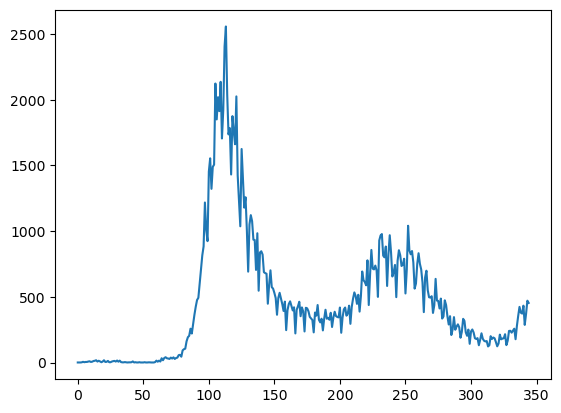

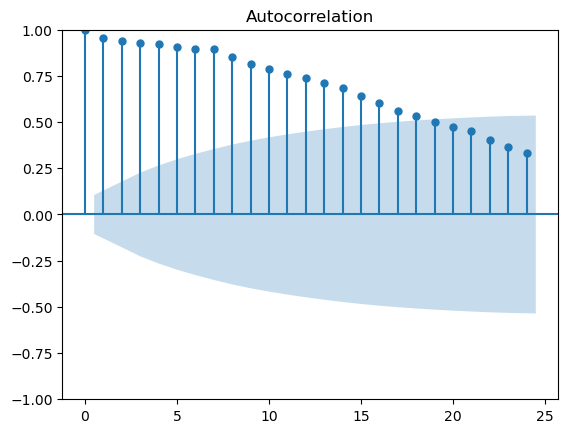

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


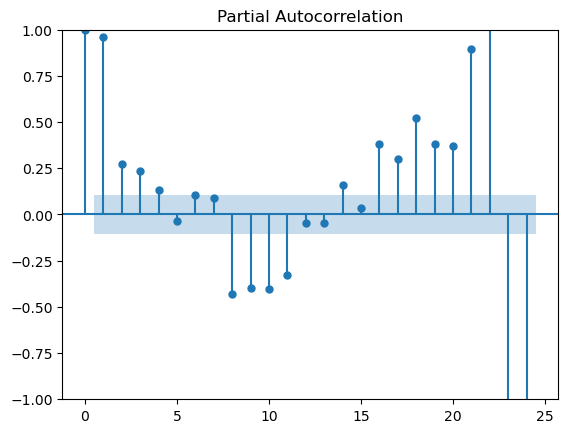

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\基隆市每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Keelung.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Keelung_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Keelung_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\基隆市每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        1
2        1
3        2
4        6
..     ...
341    287
342    370
343    471
344    454
345    387

[346 rows x 1 columns]
346


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
31/31 [==============================] - 5s 39ms/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 2/5000
31/31 [==============================] - 0s 5ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3/5000
31/31 [==============================]

31/31 [==============================] - 0s 5ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 57/5000
31/31 [==============================] - 0s 5ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 58/5000
31/31 [==============================] - 0s 5ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 59/5000
31/31 [==============================] - 0s 5ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 60/5000
31/31 [==============================] - 0s 5ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 61/5000
31/31 [==============================] - 0s 5ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 62/5000
31/31 [==============================] - 0s 6ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 63/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0130 -

Epoch 117/5000
31/31 [==============================] - 0s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.7969e-04 - val_mse: 8.7969e-04
Epoch 118/5000
31/31 [==============================] - 0s 14ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.3993e-04 - val_mse: 8.3993e-04
Epoch 119/5000
31/31 [==============================] - 0s 13ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 7.7189e-04 - val_mse: 7.7189e-04
Epoch 120/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.8095e-04 - val_mse: 7.8095e-04
Epoch 121/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.8687e-04 - val_mse: 7.8687e-04
Epoch 122/5000
31/31 [==============================] - 0s 14ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.5919e-04 - val_mse: 7.5919e-04
Epoch 123/5000
31/31 [==============================] - 0s 10ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.4483e-04 - val_mse: 7.4483e-04
Ep

31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.9240e-04 - val_mse: 4.9240e-04
Epoch 175/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.9716e-04 - val_mse: 4.9716e-04
Epoch 176/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.9471e-04 - val_mse: 4.9471e-04
Epoch 177/5000
31/31 [==============================] - 0s 12ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.8180e-04 - val_mse: 4.8180e-04
Epoch 178/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 4.9418e-04 - val_mse: 4.9418e-04
Epoch 179/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 4.8995e-04 - val_mse: 4.8995e-04
Epoch 180/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 4.8988e-04 - val_mse: 4.8988e-04
Epoch 181/5000
31/31

Epoch 232/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8651e-04 - val_mse: 4.8651e-04
Epoch 233/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8409e-04 - val_mse: 4.8409e-04
Epoch 234/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8472e-04 - val_mse: 4.8472e-04
Epoch 235/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8771e-04 - val_mse: 4.8771e-04
Epoch 236/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8478e-04 - val_mse: 4.8478e-04
Epoch 237/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8579e-04 - val_mse: 4.8579e-04
Epoch 238/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8571e-04 - val_mse: 4.8571e-04
Epoch 

Epoch 290/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9511e-04 - val_mse: 4.9511e-04
Epoch 291/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9511e-04 - val_mse: 4.9511e-04
Epoch 292/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9850e-04 - val_mse: 4.9850e-04
Epoch 293/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9531e-04 - val_mse: 4.9531e-04
Epoch 294/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9666e-04 - val_mse: 4.9666e-04
Epoch 295/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9611e-04 - val_mse: 4.9611e-04
Epoch 296/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9600e-04 - val_mse: 4.9600e-04
Epoch 

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9969e-04 - val_mse: 4.9969e-04
Epoch 348/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0004e-04 - val_mse: 5.0004e-04
Epoch 349/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9877e-04 - val_mse: 4.9877e-04
Epoch 350/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9869e-04 - val_mse: 4.9869e-04
Epoch 351/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9961e-04 - val_mse: 4.9961e-04
Epoch 352/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0153e-04 - val_mse: 5.0153e-04
Epoch 353/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9960e-04 - val_mse: 4.9960e-04
Epoch 354/5000
31/31 

Epoch 405/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0035e-04 - val_mse: 5.0035e-04
Epoch 406/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0386e-04 - val_mse: 5.0386e-04
Epoch 407/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0177e-04 - val_mse: 5.0177e-04
Epoch 408/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0009e-04 - val_mse: 5.0009e-04
Epoch 409/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0030e-04 - val_mse: 5.0030e-04
Epoch 410/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0179e-04 - val_mse: 5.0179e-04
Epoch 411/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0100e-04 - val_mse: 5.0100e-04
Epoch 

Epoch 463/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0368e-04 - val_mse: 5.0368e-04
Epoch 464/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0385e-04 - val_mse: 5.0385e-04
Epoch 465/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9984e-04 - val_mse: 4.9984e-04
Epoch 466/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0013e-04 - val_mse: 5.0013e-04
Epoch 467/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0157e-04 - val_mse: 5.0157e-04
Epoch 468/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0255e-04 - val_mse: 5.0255e-04
Epoch 469/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0012e-04 - val_mse: 5.0012e-04
Epoch 

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0182e-04 - val_mse: 5.0182e-04
Epoch 521/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0168e-04 - val_mse: 5.0168e-04
Epoch 522/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0001e-04 - val_mse: 5.0001e-04
Epoch 523/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9979e-04 - val_mse: 4.9979e-04
Epoch 524/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0259e-04 - val_mse: 5.0259e-04
Epoch 525/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0046e-04 - val_mse: 5.0046e-04
Epoch 526/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0409e-04 - val_mse: 5.0409e-04
Epoch 527/5000
31/31 

Epoch 578/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0104e-04 - val_mse: 5.0104e-04
Epoch 579/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9996e-04 - val_mse: 4.9996e-04
Epoch 580/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0165e-04 - val_mse: 5.0165e-04
Epoch 581/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0037e-04 - val_mse: 5.0037e-04
Epoch 582/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0228e-04 - val_mse: 5.0228e-04
Epoch 583/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0126e-04 - val_mse: 5.0126e-04
Epoch 584/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0045e-04 - val_mse: 5.0045e-04
Epoch 

Epoch 636/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0075e-04 - val_mse: 5.0075e-04
Epoch 637/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9986e-04 - val_mse: 4.9986e-04
Epoch 638/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0197e-04 - val_mse: 5.0197e-04
Epoch 639/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0037e-04 - val_mse: 5.0037e-04
Epoch 640/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9968e-04 - val_mse: 4.9968e-04
Epoch 641/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0233e-04 - val_mse: 5.0233e-04
Epoch 642/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0124e-04 - val_mse: 5.0124e-04
Epoch 

Epoch 694/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9953e-04 - val_mse: 4.9953e-04
Epoch 695/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0049e-04 - val_mse: 5.0049e-04
Epoch 696/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0001e-04 - val_mse: 5.0001e-04
Epoch 697/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9936e-04 - val_mse: 4.9936e-04
Epoch 698/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9905e-04 - val_mse: 4.9905e-04
Epoch 699/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0187e-04 - val_mse: 5.0187e-04
Epoch 700/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9899e-04 - val_mse: 4.9899e-04
Epoch 

Epoch 752/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0047e-04 - val_mse: 5.0047e-04
Epoch 753/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0241e-04 - val_mse: 5.0241e-04
Epoch 754/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9927e-04 - val_mse: 4.9927e-04
Epoch 755/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0050e-04 - val_mse: 5.0050e-04
Epoch 756/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9855e-04 - val_mse: 4.9855e-04
Epoch 757/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0321e-04 - val_mse: 5.0321e-04
Epoch 758/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9964e-04 - val_mse: 4.9964e-04
Epoch 

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9967e-04 - val_mse: 4.9967e-04
Epoch 810/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9869e-04 - val_mse: 4.9869e-04
Epoch 811/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9762e-04 - val_mse: 4.9762e-04
Epoch 812/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9835e-04 - val_mse: 4.9835e-04
Epoch 813/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9764e-04 - val_mse: 4.9764e-04
Epoch 814/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0206e-04 - val_mse: 5.0206e-04
Epoch 815/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0418e-04 - val_mse: 5.0418e-04
Epoch 816/5000
31/31 

Epoch 867/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9756e-04 - val_mse: 4.9756e-04
Epoch 868/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9876e-04 - val_mse: 4.9876e-04
Epoch 869/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9746e-04 - val_mse: 4.9746e-04
Epoch 870/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0073e-04 - val_mse: 5.0073e-04
Epoch 871/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9931e-04 - val_mse: 4.9931e-04
Epoch 872/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9784e-04 - val_mse: 4.9784e-04
Epoch 873/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9980e-04 - val_mse: 4.9980e-04
Epoch 

Epoch 925/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9911e-04 - val_mse: 4.9911e-04
Epoch 926/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9828e-04 - val_mse: 4.9828e-04
Epoch 927/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9763e-04 - val_mse: 4.9763e-04
Epoch 928/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9802e-04 - val_mse: 4.9802e-04
Epoch 929/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9946e-04 - val_mse: 4.9946e-04
Epoch 930/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9857e-04 - val_mse: 4.9857e-04
Epoch 931/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9814e-04 - val_mse: 4.9814e-04
Epoch 

Epoch 983/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9840e-04 - val_mse: 4.9840e-04
Epoch 984/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9730e-04 - val_mse: 4.9730e-04
Epoch 985/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9692e-04 - val_mse: 4.9692e-04
Epoch 986/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9986e-04 - val_mse: 4.9986e-04
Epoch 987/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9744e-04 - val_mse: 4.9744e-04
Epoch 988/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9874e-04 - val_mse: 4.9874e-04
Epoch 989/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9760e-04 - val_mse: 4.9760e-04
Epoch 

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9784e-04 - val_mse: 4.9784e-04
Epoch 1041/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9730e-04 - val_mse: 4.9730e-04
Epoch 1042/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9879e-04 - val_mse: 4.9879e-04
Epoch 1043/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9723e-04 - val_mse: 4.9723e-04
Epoch 1044/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9585e-04 - val_mse: 4.9585e-04
Epoch 1045/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9714e-04 - val_mse: 4.9714e-04
Epoch 1046/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9768e-04 - val_mse: 4.9768e-04
Epoch 1047/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9950e-04 - val_mse: 4.9950e-04
Epoch 1098/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9623e-04 - val_mse: 4.9623e-04
Epoch 1099/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9773e-04 - val_mse: 4.9773e-04
Epoch 1100/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0088e-04 - val_mse: 5.0088e-04
Epoch 1101/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9747e-04 - val_mse: 4.9747e-04
Epoch 1102/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9838e-04 - val_mse: 4.9838e-04
Epoch 1103/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9772e-04 - val_mse: 4.9772e-04
Epoch 1104/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9694e-04 - val_mse: 4.9694e-04
Epoch 1155/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9715e-04 - val_mse: 4.9715e-04
Epoch 1156/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9846e-04 - val_mse: 4.9846e-04
Epoch 1157/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9676e-04 - val_mse: 4.9676e-04
Epoch 1158/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9764e-04 - val_mse: 4.9764e-04
Epoch 1159/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9822e-04 - val_mse: 4.9822e-04
Epoch 1160/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9926e-04 - val_mse: 4.9926e-04
Epoch 1161/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9654e-04 - val_mse: 4.9654e-04
Epoch 1212/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9587e-04 - val_mse: 4.9587e-04
Epoch 1213/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9841e-04 - val_mse: 4.9841e-04
Epoch 1214/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9535e-04 - val_mse: 4.9535e-04
Epoch 1215/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9731e-04 - val_mse: 4.9731e-04
Epoch 1216/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0267e-04 - val_mse: 5.0267e-04
Epoch 1217/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9777e-04 - val_mse: 4.9777e-04
Epoch 1218/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9674e-04 - val_mse: 4.9674e-04
Epoch 1269/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9529e-04 - val_mse: 4.9529e-04
Epoch 1270/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9617e-04 - val_mse: 4.9617e-04
Epoch 1271/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9459e-04 - val_mse: 4.9459e-04
Epoch 1272/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0123e-04 - val_mse: 5.0123e-04
Epoch 1273/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9809e-04 - val_mse: 4.9809e-04
Epoch 1274/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9649e-04 - val_mse: 4.9649e-04
Epoch 1275/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9817e-04 - val_mse: 4.9817e-04
Epoch 1326/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9503e-04 - val_mse: 4.9503e-04
Epoch 1327/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9710e-04 - val_mse: 4.9710e-04
Epoch 1328/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9648e-04 - val_mse: 4.9648e-04
Epoch 1329/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9467e-04 - val_mse: 4.9467e-04
Epoch 1330/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9919e-04 - val_mse: 4.9919e-04
Epoch 1331/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9697e-04 - val_mse: 4.9697e-04
Epoch 1332/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9460e-04 - val_mse: 4.9460e-04
Epoch 1383/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9502e-04 - val_mse: 4.9502e-04
Epoch 1384/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9557e-04 - val_mse: 4.9557e-04
Epoch 1385/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9637e-04 - val_mse: 4.9637e-04
Epoch 1386/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9611e-04 - val_mse: 4.9611e-04
Epoch 1387/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9463e-04 - val_mse: 4.9463e-04
Epoch 1388/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9701e-04 - val_mse: 4.9701e-04
Epoch 1389/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9518e-04 - val_mse: 4.9518e-04
Epoch 1440/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9514e-04 - val_mse: 4.9514e-04
Epoch 1441/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9586e-04 - val_mse: 4.9586e-04
Epoch 1442/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9369e-04 - val_mse: 4.9369e-04
Epoch 1443/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9710e-04 - val_mse: 4.9710e-04
Epoch 1444/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9662e-04 - val_mse: 4.9662e-04
Epoch 1445/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9365e-04 - val_mse: 4.9365e-04
Epoch 1446/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9570e-04 - val_mse: 4.9570e-04
Epoch 1497/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9347e-04 - val_mse: 4.9347e-04
Epoch 1498/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9623e-04 - val_mse: 4.9623e-04
Epoch 1499/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9701e-04 - val_mse: 4.9701e-04
Epoch 1500/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9425e-04 - val_mse: 4.9425e-04
Epoch 1501/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9505e-04 - val_mse: 4.9505e-04
Epoch 1502/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9793e-04 - val_mse: 4.9793e-04
Epoch 1503/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9773e-04 - val_mse: 4.9773e-04
Epoch 1554/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9523e-04 - val_mse: 4.9523e-04
Epoch 1555/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9551e-04 - val_mse: 4.9551e-04
Epoch 1556/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9520e-04 - val_mse: 4.9520e-04
Epoch 1557/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9473e-04 - val_mse: 4.9473e-04
Epoch 1558/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9505e-04 - val_mse: 4.9505e-04
Epoch 1559/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9330e-04 - val_mse: 4.9330e-04
Epoch 1560/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9606e-04 - val_mse: 4.9606e-04
Epoch 1611/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9490e-04 - val_mse: 4.9490e-04
Epoch 1612/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9382e-04 - val_mse: 4.9382e-04
Epoch 1613/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9703e-04 - val_mse: 4.9703e-04
Epoch 1614/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9556e-04 - val_mse: 4.9556e-04
Epoch 1615/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9277e-04 - val_mse: 4.9277e-04
Epoch 1616/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9483e-04 - val_mse: 4.9483e-04
Epoch 1617/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9312e-04 - val_mse: 4.9312e-04
Epoch 1668/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9767e-04 - val_mse: 4.9767e-04
Epoch 1669/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9533e-04 - val_mse: 4.9533e-04
Epoch 1670/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9480e-04 - val_mse: 4.9480e-04
Epoch 1671/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9632e-04 - val_mse: 4.9632e-04
Epoch 1672/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9368e-04 - val_mse: 4.9368e-04
Epoch 1673/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9733e-04 - val_mse: 4.9733e-04
Epoch 1674/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9432e-04 - val_mse: 4.9432e-04
Epoch 1725/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9422e-04 - val_mse: 4.9422e-04
Epoch 1726/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9292e-04 - val_mse: 4.9292e-04
Epoch 1727/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9389e-04 - val_mse: 4.9389e-04
Epoch 1728/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9595e-04 - val_mse: 4.9595e-04
Epoch 1729/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9376e-04 - val_mse: 4.9376e-04
Epoch 1730/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9322e-04 - val_mse: 4.9322e-04
Epoch 1731/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9313e-04 - val_mse: 4.9313e-04
Epoch 1782/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9482e-04 - val_mse: 4.9482e-04
Epoch 1783/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9513e-04 - val_mse: 4.9513e-04
Epoch 1784/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9255e-04 - val_mse: 4.9255e-04
Epoch 1785/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9661e-04 - val_mse: 4.9661e-04
Epoch 1786/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9231e-04 - val_mse: 4.9231e-04
Epoch 1787/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9517e-04 - val_mse: 4.9517e-04
Epoch 1788/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9217e-04 - val_mse: 4.9217e-04
Epoch 1839/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9378e-04 - val_mse: 4.9378e-04
Epoch 1840/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9284e-04 - val_mse: 4.9284e-04
Epoch 1841/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9365e-04 - val_mse: 4.9365e-04
Epoch 1842/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9218e-04 - val_mse: 4.9218e-04
Epoch 1843/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9494e-04 - val_mse: 4.9494e-04
Epoch 1844/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9413e-04 - val_mse: 4.9413e-04
Epoch 1845/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9407e-04 - val_mse: 4.9407e-04
Epoch 1896/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9431e-04 - val_mse: 4.9431e-04
Epoch 1897/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9235e-04 - val_mse: 4.9235e-04
Epoch 1898/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9404e-04 - val_mse: 4.9404e-04
Epoch 1899/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9580e-04 - val_mse: 4.9580e-04
Epoch 1900/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9276e-04 - val_mse: 4.9276e-04
Epoch 1901/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9098e-04 - val_mse: 4.9098e-04
Epoch 1902/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9365e-04 - val_mse: 4.9365e-04
Epoch 1953/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9139e-04 - val_mse: 4.9139e-04
Epoch 1954/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9587e-04 - val_mse: 4.9587e-04
Epoch 1955/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9202e-04 - val_mse: 4.9202e-04
Epoch 1956/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9453e-04 - val_mse: 4.9453e-04
Epoch 1957/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9550e-04 - val_mse: 4.9550e-04
Epoch 1958/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9216e-04 - val_mse: 4.9216e-04
Epoch 1959/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9141e-04 - val_mse: 4.9141e-04
Epoch 2010/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9297e-04 - val_mse: 4.9297e-04
Epoch 2011/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9104e-04 - val_mse: 4.9104e-04
Epoch 2012/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9432e-04 - val_mse: 4.9432e-04
Epoch 2013/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9148e-04 - val_mse: 4.9148e-04
Epoch 2014/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9302e-04 - val_mse: 4.9302e-04
Epoch 2015/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9225e-04 - val_mse: 4.9225e-04
Epoch 2016/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9083e-04 - val_mse: 4.9083e-04
Epoch 2067/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9397e-04 - val_mse: 4.9397e-04
Epoch 2068/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9198e-04 - val_mse: 4.9198e-04
Epoch 2069/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9388e-04 - val_mse: 4.9388e-04
Epoch 2070/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9329e-04 - val_mse: 4.9329e-04
Epoch 2071/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9213e-04 - val_mse: 4.9213e-04
Epoch 2072/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9388e-04 - val_mse: 4.9388e-04
Epoch 2073/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9066e-04 - val_mse: 4.9066e-04
Epoch 2124/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9248e-04 - val_mse: 4.9248e-04
Epoch 2125/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9292e-04 - val_mse: 4.9292e-04
Epoch 2126/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9217e-04 - val_mse: 4.9217e-04
Epoch 2127/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9061e-04 - val_mse: 4.9061e-04
Epoch 2128/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9369e-04 - val_mse: 4.9369e-04
Epoch 2129/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9231e-04 - val_mse: 4.9231e-04
Epoch 2130/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9008e-04 - val_mse: 4.9008e-04
Epoch 2181/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9201e-04 - val_mse: 4.9201e-04
Epoch 2182/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9450e-04 - val_mse: 4.9450e-04
Epoch 2183/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9079e-04 - val_mse: 4.9079e-04
Epoch 2184/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9261e-04 - val_mse: 4.9261e-04
Epoch 2185/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9450e-04 - val_mse: 4.9450e-04
Epoch 2186/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9389e-04 - val_mse: 4.9389e-04
Epoch 2187/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9164e-04 - val_mse: 4.9164e-04
Epoch 2238/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9382e-04 - val_mse: 4.9382e-04
Epoch 2239/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9162e-04 - val_mse: 4.9162e-04
Epoch 2240/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9007e-04 - val_mse: 4.9007e-04
Epoch 2241/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9036e-04 - val_mse: 4.9036e-04
Epoch 2242/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9168e-04 - val_mse: 4.9168e-04
Epoch 2243/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9201e-04 - val_mse: 4.9201e-04
Epoch 2244/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9064e-04 - val_mse: 4.9064e-04
Epoch 2295/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9254e-04 - val_mse: 4.9254e-04
Epoch 2296/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9440e-04 - val_mse: 4.9440e-04
Epoch 2297/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9424e-04 - val_mse: 4.9424e-04
Epoch 2298/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9218e-04 - val_mse: 4.9218e-04
Epoch 2299/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8960e-04 - val_mse: 4.8960e-04
Epoch 2300/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9174e-04 - val_mse: 4.9174e-04
Epoch 2301/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9064e-04 - val_mse: 4.9064e-04
Epoch 2352/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9122e-04 - val_mse: 4.9122e-04
Epoch 2353/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9359e-04 - val_mse: 4.9359e-04
Epoch 2354/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9025e-04 - val_mse: 4.9025e-04
Epoch 2355/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9279e-04 - val_mse: 4.9279e-04
Epoch 2356/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9092e-04 - val_mse: 4.9092e-04
Epoch 2357/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9139e-04 - val_mse: 4.9139e-04
Epoch 2358/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9040e-04 - val_mse: 4.9040e-04
Epoch 2409/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9168e-04 - val_mse: 4.9168e-04
Epoch 2410/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9387e-04 - val_mse: 4.9387e-04
Epoch 2411/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9128e-04 - val_mse: 4.9128e-04
Epoch 2412/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8974e-04 - val_mse: 4.8974e-04
Epoch 2413/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9350e-04 - val_mse: 4.9350e-04
Epoch 2414/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9259e-04 - val_mse: 4.9259e-04
Epoch 2415/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9132e-04 - val_mse: 4.9132e-04
Epoch 2466/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9055e-04 - val_mse: 4.9055e-04
Epoch 2467/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9018e-04 - val_mse: 4.9018e-04
Epoch 2468/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9232e-04 - val_mse: 4.9232e-04
Epoch 2469/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9007e-04 - val_mse: 4.9007e-04
Epoch 2470/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8923e-04 - val_mse: 4.8923e-04
Epoch 2471/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9200e-04 - val_mse: 4.9200e-04
Epoch 2472/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9489e-04 - val_mse: 4.9489e-04
Epoch 2523/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9346e-04 - val_mse: 4.9346e-04
Epoch 2524/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9018e-04 - val_mse: 4.9018e-04
Epoch 2525/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9149e-04 - val_mse: 4.9149e-04
Epoch 2526/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8974e-04 - val_mse: 4.8974e-04
Epoch 2527/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9003e-04 - val_mse: 4.9003e-04
Epoch 2528/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8995e-04 - val_mse: 4.8995e-04
Epoch 2529/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8924e-04 - val_mse: 4.8924e-04
Epoch 2580/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9124e-04 - val_mse: 4.9124e-04
Epoch 2581/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8974e-04 - val_mse: 4.8974e-04
Epoch 2582/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9019e-04 - val_mse: 4.9019e-04
Epoch 2583/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9271e-04 - val_mse: 4.9271e-04
Epoch 2584/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9159e-04 - val_mse: 4.9159e-04
Epoch 2585/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8868e-04 - val_mse: 4.8868e-04
Epoch 2586/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9263e-04 - val_mse: 4.9263e-04
Epoch 2637/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8932e-04 - val_mse: 4.8932e-04
Epoch 2638/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9108e-04 - val_mse: 4.9108e-04
Epoch 2639/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8961e-04 - val_mse: 4.8961e-04
Epoch 2640/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9113e-04 - val_mse: 4.9113e-04
Epoch 2641/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9157e-04 - val_mse: 4.9157e-04
Epoch 2642/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8863e-04 - val_mse: 4.8863e-04
Epoch 2643/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9069e-04 - val_mse: 4.9069e-04
Epoch 2694/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9006e-04 - val_mse: 4.9006e-04
Epoch 2695/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8900e-04 - val_mse: 4.8900e-04
Epoch 2696/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9039e-04 - val_mse: 4.9039e-04
Epoch 2697/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9031e-04 - val_mse: 4.9031e-04
Epoch 2698/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8851e-04 - val_mse: 4.8851e-04
Epoch 2699/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8863e-04 - val_mse: 4.8863e-04
Epoch 2700/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9120e-04 - val_mse: 4.9120e-04
Epoch 2751/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8787e-04 - val_mse: 4.8787e-04
Epoch 2752/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8977e-04 - val_mse: 4.8977e-04
Epoch 2753/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8951e-04 - val_mse: 4.8951e-04
Epoch 2754/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8805e-04 - val_mse: 4.8805e-04
Epoch 2755/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9347e-04 - val_mse: 4.9347e-04
Epoch 2756/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9116e-04 - val_mse: 4.9116e-04
Epoch 2757/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8860e-04 - val_mse: 4.8860e-04
Epoch 2808/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8829e-04 - val_mse: 4.8829e-04
Epoch 2809/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9071e-04 - val_mse: 4.9071e-04
Epoch 2810/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9142e-04 - val_mse: 4.9142e-04
Epoch 2811/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9180e-04 - val_mse: 4.9180e-04
Epoch 2812/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9041e-04 - val_mse: 4.9041e-04
Epoch 2813/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8984e-04 - val_mse: 4.8984e-04
Epoch 2814/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8798e-04 - val_mse: 4.8798e-04
Epoch 2865/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8797e-04 - val_mse: 4.8797e-04
Epoch 2866/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8906e-04 - val_mse: 4.8906e-04
Epoch 2867/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8851e-04 - val_mse: 4.8851e-04
Epoch 2868/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9016e-04 - val_mse: 4.9016e-04
Epoch 2869/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9218e-04 - val_mse: 4.9218e-04
Epoch 2870/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8852e-04 - val_mse: 4.8852e-04
Epoch 2871/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8777e-04 - val_mse: 4.8777e-04
Epoch 2922/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8877e-04 - val_mse: 4.8877e-04
Epoch 2923/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8821e-04 - val_mse: 4.8821e-04
Epoch 2924/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8937e-04 - val_mse: 4.8937e-04
Epoch 2925/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8782e-04 - val_mse: 4.8782e-04
Epoch 2926/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9115e-04 - val_mse: 4.9115e-04
Epoch 2927/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8928e-04 - val_mse: 4.8928e-04
Epoch 2928/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8925e-04 - val_mse: 4.8925e-04
Epoch 2979/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9002e-04 - val_mse: 4.9002e-04
Epoch 2980/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8766e-04 - val_mse: 4.8766e-04
Epoch 2981/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9029e-04 - val_mse: 4.9029e-04
Epoch 2982/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9153e-04 - val_mse: 4.9153e-04
Epoch 2983/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8778e-04 - val_mse: 4.8778e-04
Epoch 2984/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8889e-04 - val_mse: 4.8889e-04
Epoch 2985/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8734e-04 - val_mse: 4.8734e-04
Epoch 3036/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8874e-04 - val_mse: 4.8874e-04
Epoch 3037/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8957e-04 - val_mse: 4.8957e-04
Epoch 3038/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9030e-04 - val_mse: 4.9030e-04
Epoch 3039/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9200e-04 - val_mse: 4.9200e-04
Epoch 3040/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8790e-04 - val_mse: 4.8790e-04
Epoch 3041/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8917e-04 - val_mse: 4.8917e-04
Epoch 3042/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8953e-04 - val_mse: 4.8953e-04
Epoch 3093/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8768e-04 - val_mse: 4.8768e-04
Epoch 3094/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8851e-04 - val_mse: 4.8851e-04
Epoch 3095/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8762e-04 - val_mse: 4.8762e-04
Epoch 3096/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9154e-04 - val_mse: 4.9154e-04
Epoch 3097/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8867e-04 - val_mse: 4.8867e-04
Epoch 3098/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8929e-04 - val_mse: 4.8929e-04
Epoch 3099/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8710e-04 - val_mse: 4.8710e-04
Epoch 3150/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9120e-04 - val_mse: 4.9120e-04
Epoch 3151/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8978e-04 - val_mse: 4.8978e-04
Epoch 3152/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8668e-04 - val_mse: 4.8668e-04
Epoch 3153/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8855e-04 - val_mse: 4.8855e-04
Epoch 3154/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8861e-04 - val_mse: 4.8861e-04
Epoch 3155/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8711e-04 - val_mse: 4.8711e-04
Epoch 3156/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9005e-04 - val_mse: 4.9005e-04
Epoch 3207/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8979e-04 - val_mse: 4.8979e-04
Epoch 3208/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9185e-04 - val_mse: 4.9185e-04
Epoch 3209/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8801e-04 - val_mse: 4.8801e-04
Epoch 3210/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8808e-04 - val_mse: 4.8808e-04
Epoch 3211/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9170e-04 - val_mse: 4.9170e-04
Epoch 3212/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9089e-04 - val_mse: 4.9089e-04
Epoch 3213/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8770e-04 - val_mse: 4.8770e-04
Epoch 3264/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8915e-04 - val_mse: 4.8915e-04
Epoch 3265/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8780e-04 - val_mse: 4.8780e-04
Epoch 3266/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9027e-04 - val_mse: 4.9027e-04
Epoch 3267/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8659e-04 - val_mse: 4.8659e-04
Epoch 3268/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8545e-04 - val_mse: 4.8545e-04
Epoch 3269/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9048e-04 - val_mse: 4.9048e-04
Epoch 3270/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8856e-04 - val_mse: 4.8856e-04
Epoch 3321/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8873e-04 - val_mse: 4.8873e-04
Epoch 3322/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8585e-04 - val_mse: 4.8585e-04
Epoch 3323/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8695e-04 - val_mse: 4.8695e-04
Epoch 3324/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8785e-04 - val_mse: 4.8785e-04
Epoch 3325/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8744e-04 - val_mse: 4.8744e-04
Epoch 3326/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8702e-04 - val_mse: 4.8702e-04
Epoch 3327/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8583e-04 - val_mse: 4.8583e-04
Epoch 3378/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8741e-04 - val_mse: 4.8741e-04
Epoch 3379/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8758e-04 - val_mse: 4.8758e-04
Epoch 3380/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8748e-04 - val_mse: 4.8748e-04
Epoch 3381/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8758e-04 - val_mse: 4.8758e-04
Epoch 3382/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8870e-04 - val_mse: 4.8870e-04
Epoch 3383/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9001e-04 - val_mse: 4.9001e-04
Epoch 3384/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8889e-04 - val_mse: 4.8889e-04
Epoch 3435/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8945e-04 - val_mse: 4.8945e-04
Epoch 3436/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9007e-04 - val_mse: 4.9007e-04
Epoch 3437/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8548e-04 - val_mse: 4.8548e-04
Epoch 3438/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8603e-04 - val_mse: 4.8603e-04
Epoch 3439/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8999e-04 - val_mse: 4.8999e-04
Epoch 3440/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8499e-04 - val_mse: 4.8499e-04
Epoch 3441/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8709e-04 - val_mse: 4.8709e-04
Epoch 3492/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8626e-04 - val_mse: 4.8626e-04
Epoch 3493/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8785e-04 - val_mse: 4.8785e-04
Epoch 3494/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8875e-04 - val_mse: 4.8875e-04
Epoch 3495/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8818e-04 - val_mse: 4.8818e-04
Epoch 3496/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8812e-04 - val_mse: 4.8812e-04
Epoch 3497/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8750e-04 - val_mse: 4.8750e-04
Epoch 3498/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8578e-04 - val_mse: 4.8578e-04
Epoch 3549/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8602e-04 - val_mse: 4.8602e-04
Epoch 3550/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9083e-04 - val_mse: 4.9083e-04
Epoch 3551/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8591e-04 - val_mse: 4.8591e-04
Epoch 3552/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8626e-04 - val_mse: 4.8626e-04
Epoch 3553/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8825e-04 - val_mse: 4.8825e-04
Epoch 3554/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8754e-04 - val_mse: 4.8754e-04
Epoch 3555/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8660e-04 - val_mse: 4.8660e-04
Epoch 3606/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8982e-04 - val_mse: 4.8982e-04
Epoch 3607/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9047e-04 - val_mse: 4.9047e-04
Epoch 3608/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8607e-04 - val_mse: 4.8607e-04
Epoch 3609/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8725e-04 - val_mse: 4.8725e-04
Epoch 3610/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8508e-04 - val_mse: 4.8508e-04
Epoch 3611/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8613e-04 - val_mse: 4.8613e-04
Epoch 3612/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8808e-04 - val_mse: 4.8808e-04
Epoch 3663/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8659e-04 - val_mse: 4.8659e-04
Epoch 3664/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8655e-04 - val_mse: 4.8655e-04
Epoch 3665/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8788e-04 - val_mse: 4.8788e-04
Epoch 3666/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8563e-04 - val_mse: 4.8563e-04
Epoch 3667/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8771e-04 - val_mse: 4.8771e-04
Epoch 3668/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8815e-04 - val_mse: 4.8815e-04
Epoch 3669/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8633e-04 - val_mse: 4.8633e-04
Epoch 3720/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8749e-04 - val_mse: 4.8749e-04
Epoch 3721/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8444e-04 - val_mse: 4.8444e-04
Epoch 3722/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8706e-04 - val_mse: 4.8706e-04
Epoch 3723/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8785e-04 - val_mse: 4.8785e-04
Epoch 3724/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8611e-04 - val_mse: 4.8611e-04
Epoch 3725/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8461e-04 - val_mse: 4.8461e-04
Epoch 3726/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8620e-04 - val_mse: 4.8620e-04
Epoch 3777/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8746e-04 - val_mse: 4.8746e-04
Epoch 3778/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8422e-04 - val_mse: 4.8422e-04
Epoch 3779/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8679e-04 - val_mse: 4.8679e-04
Epoch 3780/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8502e-04 - val_mse: 4.8502e-04
Epoch 3781/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8829e-04 - val_mse: 4.8829e-04
Epoch 3782/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8483e-04 - val_mse: 4.8483e-04
Epoch 3783/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8836e-04 - val_mse: 4.8836e-04
Epoch 3834/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8823e-04 - val_mse: 4.8823e-04
Epoch 3835/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8558e-04 - val_mse: 4.8558e-04
Epoch 3836/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8608e-04 - val_mse: 4.8608e-04
Epoch 3837/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8742e-04 - val_mse: 4.8742e-04
Epoch 3838/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8428e-04 - val_mse: 4.8428e-04
Epoch 3839/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8700e-04 - val_mse: 4.8700e-04
Epoch 3840/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8467e-04 - val_mse: 4.8467e-04
Epoch 3891/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8675e-04 - val_mse: 4.8675e-04
Epoch 3892/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8535e-04 - val_mse: 4.8535e-04
Epoch 3893/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8515e-04 - val_mse: 4.8515e-04
Epoch 3894/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8658e-04 - val_mse: 4.8658e-04
Epoch 3895/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8513e-04 - val_mse: 4.8513e-04
Epoch 3896/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8575e-04 - val_mse: 4.8575e-04
Epoch 3897/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8775e-04 - val_mse: 4.8775e-04
Epoch 3948/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8589e-04 - val_mse: 4.8589e-04
Epoch 3949/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8521e-04 - val_mse: 4.8521e-04
Epoch 3950/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8746e-04 - val_mse: 4.8746e-04
Epoch 3951/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8464e-04 - val_mse: 4.8464e-04
Epoch 3952/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8505e-04 - val_mse: 4.8505e-04
Epoch 3953/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8666e-04 - val_mse: 4.8666e-04
Epoch 3954/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8447e-04 - val_mse: 4.8447e-04
Epoch 4005/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8788e-04 - val_mse: 4.8788e-04
Epoch 4006/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8707e-04 - val_mse: 4.8707e-04
Epoch 4007/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8622e-04 - val_mse: 4.8622e-04
Epoch 4008/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8523e-04 - val_mse: 4.8523e-04
Epoch 4009/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8602e-04 - val_mse: 4.8602e-04
Epoch 4010/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8394e-04 - val_mse: 4.8394e-04
Epoch 4011/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8838e-04 - val_mse: 4.8838e-04
Epoch 4062/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8752e-04 - val_mse: 4.8752e-04
Epoch 4063/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8602e-04 - val_mse: 4.8602e-04
Epoch 4064/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8740e-04 - val_mse: 4.8740e-04
Epoch 4065/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8622e-04 - val_mse: 4.8622e-04
Epoch 4066/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8437e-04 - val_mse: 4.8437e-04
Epoch 4067/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8431e-04 - val_mse: 4.8431e-04
Epoch 4068/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8771e-04 - val_mse: 4.8771e-04
Epoch 4119/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8284e-04 - val_mse: 4.8284e-04
Epoch 4120/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8492e-04 - val_mse: 4.8492e-04
Epoch 4121/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8806e-04 - val_mse: 4.8806e-04
Epoch 4122/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8464e-04 - val_mse: 4.8464e-04
Epoch 4123/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8486e-04 - val_mse: 4.8486e-04
Epoch 4124/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8442e-04 - val_mse: 4.8442e-04
Epoch 4125/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8566e-04 - val_mse: 4.8566e-04
Epoch 4176/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8572e-04 - val_mse: 4.8572e-04
Epoch 4177/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8341e-04 - val_mse: 4.8341e-04
Epoch 4178/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8918e-04 - val_mse: 4.8918e-04
Epoch 4179/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8486e-04 - val_mse: 4.8486e-04
Epoch 4180/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8389e-04 - val_mse: 4.8389e-04
Epoch 4181/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8551e-04 - val_mse: 4.8551e-04
Epoch 4182/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8716e-04 - val_mse: 4.8716e-04
Epoch 4233/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8716e-04 - val_mse: 4.8716e-04
Epoch 4234/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8359e-04 - val_mse: 4.8359e-04
Epoch 4235/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8883e-04 - val_mse: 4.8883e-04
Epoch 4236/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8549e-04 - val_mse: 4.8549e-04
Epoch 4237/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8219e-04 - val_mse: 4.8219e-04
Epoch 4238/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8674e-04 - val_mse: 4.8674e-04
Epoch 4239/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8585e-04 - val_mse: 4.8585e-04
Epoch 4290/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8485e-04 - val_mse: 4.8485e-04
Epoch 4291/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8357e-04 - val_mse: 4.8357e-04
Epoch 4292/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8287e-04 - val_mse: 4.8287e-04
Epoch 4293/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8626e-04 - val_mse: 4.8626e-04
Epoch 4294/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8421e-04 - val_mse: 4.8421e-04
Epoch 4295/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8631e-04 - val_mse: 4.8631e-04
Epoch 4296/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8568e-04 - val_mse: 4.8568e-04
Epoch 4347/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8710e-04 - val_mse: 4.8710e-04
Epoch 4348/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8414e-04 - val_mse: 4.8414e-04
Epoch 4349/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8384e-04 - val_mse: 4.8384e-04
Epoch 4350/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8416e-04 - val_mse: 4.8416e-04
Epoch 4351/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8492e-04 - val_mse: 4.8492e-04
Epoch 4352/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8514e-04 - val_mse: 4.8514e-04
Epoch 4353/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8620e-04 - val_mse: 4.8620e-04
Epoch 4404/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8407e-04 - val_mse: 4.8407e-04
Epoch 4405/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8554e-04 - val_mse: 4.8554e-04
Epoch 4406/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8397e-04 - val_mse: 4.8397e-04
Epoch 4407/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8410e-04 - val_mse: 4.8410e-04
Epoch 4408/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8316e-04 - val_mse: 4.8316e-04
Epoch 4409/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8306e-04 - val_mse: 4.8306e-04
Epoch 4410/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8332e-04 - val_mse: 4.8332e-04
Epoch 4461/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8513e-04 - val_mse: 4.8513e-04
Epoch 4462/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8422e-04 - val_mse: 4.8422e-04
Epoch 4463/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8247e-04 - val_mse: 4.8247e-04
Epoch 4464/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8400e-04 - val_mse: 4.8400e-04
Epoch 4465/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8487e-04 - val_mse: 4.8487e-04
Epoch 4466/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8569e-04 - val_mse: 4.8569e-04
Epoch 4467/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8297e-04 - val_mse: 4.8297e-04
Epoch 4518/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8532e-04 - val_mse: 4.8532e-04
Epoch 4519/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8340e-04 - val_mse: 4.8340e-04
Epoch 4520/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8253e-04 - val_mse: 4.8253e-04
Epoch 4521/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8382e-04 - val_mse: 4.8382e-04
Epoch 4522/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8355e-04 - val_mse: 4.8355e-04
Epoch 4523/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8543e-04 - val_mse: 4.8543e-04
Epoch 4524/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8352e-04 - val_mse: 4.8352e-04
Epoch 4575/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8238e-04 - val_mse: 4.8238e-04
Epoch 4576/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8134e-04 - val_mse: 4.8134e-04
Epoch 4577/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8456e-04 - val_mse: 4.8456e-04
Epoch 4578/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8554e-04 - val_mse: 4.8554e-04
Epoch 4579/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8500e-04 - val_mse: 4.8500e-04
Epoch 4580/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8237e-04 - val_mse: 4.8237e-04
Epoch 4581/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8730e-04 - val_mse: 4.8730e-04
Epoch 4632/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8284e-04 - val_mse: 4.8284e-04
Epoch 4633/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8451e-04 - val_mse: 4.8451e-04
Epoch 4634/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8408e-04 - val_mse: 4.8408e-04
Epoch 4635/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8536e-04 - val_mse: 4.8536e-04
Epoch 4636/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8207e-04 - val_mse: 4.8207e-04
Epoch 4637/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8300e-04 - val_mse: 4.8300e-04
Epoch 4638/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8743e-04 - val_mse: 4.8743e-04
Epoch 4689/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8329e-04 - val_mse: 4.8329e-04
Epoch 4690/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8140e-04 - val_mse: 4.8140e-04
Epoch 4691/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8626e-04 - val_mse: 4.8626e-04
Epoch 4692/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8217e-04 - val_mse: 4.8217e-04
Epoch 4693/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8231e-04 - val_mse: 4.8231e-04
Epoch 4694/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8510e-04 - val_mse: 4.8510e-04
Epoch 4695/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8513e-04 - val_mse: 4.8513e-04
Epoch 4746/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8495e-04 - val_mse: 4.8495e-04
Epoch 4747/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8255e-04 - val_mse: 4.8255e-04
Epoch 4748/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8203e-04 - val_mse: 4.8203e-04
Epoch 4749/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8667e-04 - val_mse: 4.8667e-04
Epoch 4750/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8140e-04 - val_mse: 4.8140e-04
Epoch 4751/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8187e-04 - val_mse: 4.8187e-04
Epoch 4752/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8586e-04 - val_mse: 4.8586e-04
Epoch 4803/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8653e-04 - val_mse: 4.8653e-04
Epoch 4804/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8366e-04 - val_mse: 4.8366e-04
Epoch 4805/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8608e-04 - val_mse: 4.8608e-04
Epoch 4806/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8282e-04 - val_mse: 4.8282e-04
Epoch 4807/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8213e-04 - val_mse: 4.8213e-04
Epoch 4808/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8357e-04 - val_mse: 4.8357e-04
Epoch 4809/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8303e-04 - val_mse: 4.8303e-04
Epoch 4860/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8490e-04 - val_mse: 4.8490e-04
Epoch 4861/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8240e-04 - val_mse: 4.8240e-04
Epoch 4862/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8551e-04 - val_mse: 4.8551e-04
Epoch 4863/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8184e-04 - val_mse: 4.8184e-04
Epoch 4864/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8257e-04 - val_mse: 4.8257e-04
Epoch 4865/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8163e-04 - val_mse: 4.8163e-04
Epoch 4866/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8153e-04 - val_mse: 4.8153e-04
Epoch 4917/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8347e-04 - val_mse: 4.8347e-04
Epoch 4918/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8376e-04 - val_mse: 4.8376e-04
Epoch 4919/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8126e-04 - val_mse: 4.8126e-04
Epoch 4920/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8355e-04 - val_mse: 4.8355e-04
Epoch 4921/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8482e-04 - val_mse: 4.8482e-04
Epoch 4922/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8239e-04 - val_mse: 4.8239e-04
Epoch 4923/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8345e-04 - val_mse: 4.8345e-04
Epoch 4974/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8278e-04 - val_mse: 4.8278e-04
Epoch 4975/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8416e-04 - val_mse: 4.8416e-04
Epoch 4976/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8274e-04 - val_mse: 4.8274e-04
Epoch 4977/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8289e-04 - val_mse: 4.8289e-04
Epoch 4978/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8345e-04 - val_mse: 4.8345e-04
Epoch 4979/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.8035e-04 - val_mse: 4.8035e-04
Epoch 4980/5000

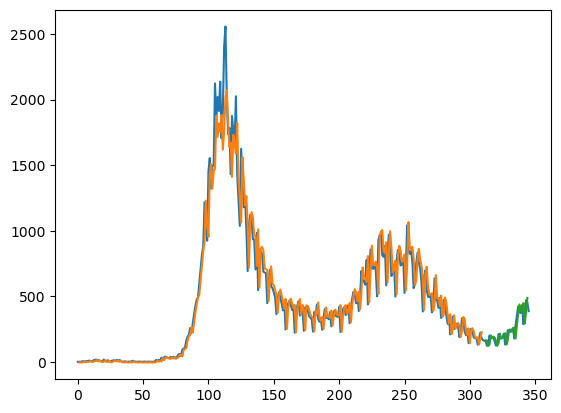

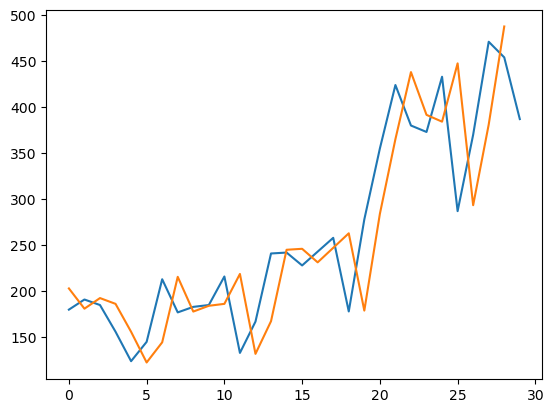

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="keelung_rnn+lstm_5000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('keelung_rnn+lstm_5000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('keelung_rnn+lstm_5000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("keelung_rnn+lstm_5000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
31/31 [==============================] - 4s 35ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2/5000
31/31 [==============================] - 0s 6ms/step - loss: 0.0400 - mse: 0.0400 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3/5000
31/31 [===========================

31/31 [==============================] - 0s 7ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 57/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 58/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 59/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 60/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 61/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 62/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 63/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0131 -

31/31 [==============================] - 0s 7ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 9.1727e-04 - val_mse: 9.1727e-04
Epoch 118/5000
31/31 [==============================] - 0s 12ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 8.7614e-04 - val_mse: 8.7614e-04
Epoch 119/5000
31/31 [==============================] - 0s 13ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.0425e-04 - val_mse: 8.0425e-04
Epoch 120/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.1324e-04 - val_mse: 8.1324e-04
Epoch 121/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 8.1991e-04 - val_mse: 8.1991e-04
Epoch 122/5000
31/31 [==============================] - 0s 16ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.9058e-04 - val_mse: 7.9058e-04
Epoch 123/5000
31/31 [==============================] - 0s 12ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.7494e-04 - val_mse: 7.7494e-04
Epoch 124/5000
31

31/31 [==============================] - 0s 8ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.9879e-04 - val_mse: 4.9879e-04
Epoch 175/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 5.0407e-04 - val_mse: 5.0407e-04
Epoch 176/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 5.0089e-04 - val_mse: 5.0089e-04
Epoch 177/5000
31/31 [==============================] - 0s 12ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.8657e-04 - val_mse: 4.8657e-04
Epoch 178/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 5.0033e-04 - val_mse: 5.0033e-04
Epoch 179/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.9561e-04 - val_mse: 4.9561e-04
Epoch 180/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 4.9540e-04 - val_mse: 4.9540e-04
Epoch 181/5000
31/31

Epoch 232/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8752e-04 - val_mse: 4.8752e-04
Epoch 233/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8402e-04 - val_mse: 4.8402e-04
Epoch 234/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8494e-04 - val_mse: 4.8494e-04
Epoch 235/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8871e-04 - val_mse: 4.8871e-04
Epoch 236/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8445e-04 - val_mse: 4.8445e-04
Epoch 237/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8613e-04 - val_mse: 4.8613e-04
Epoch 238/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8586e-04 - val_mse: 4.8586e-04
Epoch 

Epoch 290/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9524e-04 - val_mse: 4.9524e-04
Epoch 291/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9540e-04 - val_mse: 4.9540e-04
Epoch 292/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9768e-04 - val_mse: 4.9768e-04
Epoch 293/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9579e-04 - val_mse: 4.9579e-04
Epoch 294/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9641e-04 - val_mse: 4.9641e-04
Epoch 295/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9610e-04 - val_mse: 4.9610e-04
Epoch 296/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9607e-04 - val_mse: 4.9607e-04
Epoch 

Epoch 348/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0038e-04 - val_mse: 5.0038e-04
Epoch 349/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9955e-04 - val_mse: 4.9955e-04
Epoch 350/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9965e-04 - val_mse: 4.9965e-04
Epoch 351/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0016e-04 - val_mse: 5.0016e-04
Epoch 352/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0158e-04 - val_mse: 5.0158e-04
Epoch 353/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0020e-04 - val_mse: 5.0020e-04
Epoch 354/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0359e-04 - val_mse: 5.0359e-04
Epoch 

Epoch 406/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0406e-04 - val_mse: 5.0406e-04
Epoch 407/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0232e-04 - val_mse: 5.0232e-04
Epoch 408/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0105e-04 - val_mse: 5.0105e-04
Epoch 409/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0126e-04 - val_mse: 5.0126e-04
Epoch 410/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0236e-04 - val_mse: 5.0236e-04
Epoch 411/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0176e-04 - val_mse: 5.0176e-04
Epoch 412/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0124e-04 - val_mse: 5.0124e-04
Epoch 

Epoch 464/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0439e-04 - val_mse: 5.0439e-04
Epoch 465/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0124e-04 - val_mse: 5.0124e-04
Epoch 466/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0143e-04 - val_mse: 5.0143e-04
Epoch 467/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0249e-04 - val_mse: 5.0249e-04
Epoch 468/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0328e-04 - val_mse: 5.0328e-04
Epoch 469/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0141e-04 - val_mse: 5.0141e-04
Epoch 470/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0546e-04 - val_mse: 5.0546e-04
Epoch 

Epoch 522/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0143e-04 - val_mse: 5.0143e-04
Epoch 523/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0131e-04 - val_mse: 5.0131e-04
Epoch 524/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0347e-04 - val_mse: 5.0347e-04
Epoch 525/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0177e-04 - val_mse: 5.0177e-04
Epoch 526/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0481e-04 - val_mse: 5.0481e-04
Epoch 527/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0143e-04 - val_mse: 5.0143e-04
Epoch 528/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0453e-04 - val_mse: 5.0453e-04
Epoch 

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0157e-04 - val_mse: 5.0157e-04
Epoch 580/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0288e-04 - val_mse: 5.0288e-04
Epoch 581/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0185e-04 - val_mse: 5.0185e-04
Epoch 582/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0341e-04 - val_mse: 5.0341e-04
Epoch 583/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0254e-04 - val_mse: 5.0254e-04
Epoch 584/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0191e-04 - val_mse: 5.0191e-04
Epoch 585/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0183e-04 - val_mse: 5.0183e-04
Epoch 586/5000
31/31 

Epoch 637/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0155e-04 - val_mse: 5.0155e-04
Epoch 638/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0328e-04 - val_mse: 5.0328e-04
Epoch 639/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0198e-04 - val_mse: 5.0198e-04
Epoch 640/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0149e-04 - val_mse: 5.0149e-04
Epoch 641/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0359e-04 - val_mse: 5.0359e-04
Epoch 642/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0265e-04 - val_mse: 5.0265e-04
Epoch 643/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0104e-04 - val_mse: 5.0104e-04
Epoch 

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0146e-04 - val_mse: 5.0146e-04
Epoch 695/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0215e-04 - val_mse: 5.0215e-04
Epoch 696/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0177e-04 - val_mse: 5.0177e-04
Epoch 697/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0128e-04 - val_mse: 5.0128e-04
Epoch 698/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0108e-04 - val_mse: 5.0108e-04
Epoch 699/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0329e-04 - val_mse: 5.0329e-04
Epoch 700/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0107e-04 - val_mse: 5.0107e-04
Epoch 701/5000
31/31 

Epoch 752/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0223e-04 - val_mse: 5.0223e-04
Epoch 753/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0391e-04 - val_mse: 5.0391e-04
Epoch 754/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0129e-04 - val_mse: 5.0129e-04
Epoch 755/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0224e-04 - val_mse: 5.0224e-04
Epoch 756/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0083e-04 - val_mse: 5.0083e-04
Epoch 757/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0453e-04 - val_mse: 5.0453e-04
Epoch 758/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0160e-04 - val_mse: 5.0160e-04
Epoch 

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0166e-04 - val_mse: 5.0166e-04
Epoch 810/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0093e-04 - val_mse: 5.0093e-04
Epoch 811/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0023e-04 - val_mse: 5.0023e-04
Epoch 812/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0066e-04 - val_mse: 5.0066e-04
Epoch 813/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0027e-04 - val_mse: 5.0027e-04
Epoch 814/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0367e-04 - val_mse: 5.0367e-04
Epoch 815/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0547e-04 - val_mse: 5.0547e-04
Epoch 816/5000
31/31 

Epoch 867/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0021e-04 - val_mse: 5.0021e-04
Epoch 868/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0101e-04 - val_mse: 5.0101e-04
Epoch 869/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0021e-04 - val_mse: 5.0021e-04
Epoch 870/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0268e-04 - val_mse: 5.0268e-04
Epoch 871/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0154e-04 - val_mse: 5.0154e-04
Epoch 872/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0045e-04 - val_mse: 5.0045e-04
Epoch 873/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0192e-04 - val_mse: 5.0192e-04
Epoch 

Epoch 925/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0142e-04 - val_mse: 5.0142e-04
Epoch 926/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0078e-04 - val_mse: 5.0078e-04
Epoch 927/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0030e-04 - val_mse: 5.0030e-04
Epoch 928/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0057e-04 - val_mse: 5.0057e-04
Epoch 929/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0172e-04 - val_mse: 5.0172e-04
Epoch 930/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0101e-04 - val_mse: 5.0101e-04
Epoch 931/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0070e-04 - val_mse: 5.0070e-04
Epoch 

Epoch 983/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0096e-04 - val_mse: 5.0096e-04
Epoch 984/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0015e-04 - val_mse: 5.0015e-04
Epoch 985/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9988e-04 - val_mse: 4.9988e-04
Epoch 986/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0211e-04 - val_mse: 5.0211e-04
Epoch 987/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0021e-04 - val_mse: 5.0021e-04
Epoch 988/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0124e-04 - val_mse: 5.0124e-04
Epoch 989/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0040e-04 - val_mse: 5.0040e-04
Epoch 

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0059e-04 - val_mse: 5.0059e-04
Epoch 1041/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0019e-04 - val_mse: 5.0019e-04
Epoch 1042/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0134e-04 - val_mse: 5.0134e-04
Epoch 1043/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0015e-04 - val_mse: 5.0015e-04
Epoch 1044/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9931e-04 - val_mse: 4.9931e-04
Epoch 1045/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0008e-04 - val_mse: 5.0008e-04
Epoch 1046/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0047e-04 - val_mse: 5.0047e-04
Epoch 1047/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0207e-04 - val_mse: 5.0207e-04
Epoch 1098/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9951e-04 - val_mse: 4.9951e-04
Epoch 1099/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0064e-04 - val_mse: 5.0064e-04
Epoch 1100/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0317e-04 - val_mse: 5.0317e-04
Epoch 1101/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0043e-04 - val_mse: 5.0043e-04
Epoch 1102/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0113e-04 - val_mse: 5.0113e-04
Epoch 1103/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0064e-04 - val_mse: 5.0064e-04
Epoch 1104/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0008e-04 - val_mse: 5.0008e-04
Epoch 1155/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0025e-04 - val_mse: 5.0025e-04
Epoch 1156/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0127e-04 - val_mse: 5.0127e-04
Epoch 1157/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9997e-04 - val_mse: 4.9997e-04
Epoch 1158/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0059e-04 - val_mse: 5.0059e-04
Epoch 1159/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0111e-04 - val_mse: 5.0111e-04
Epoch 1160/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0196e-04 - val_mse: 5.0196e-04
Epoch 1161/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9984e-04 - val_mse: 4.9984e-04
Epoch 1212/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9939e-04 - val_mse: 4.9939e-04
Epoch 1213/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0129e-04 - val_mse: 5.0129e-04
Epoch 1214/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9906e-04 - val_mse: 4.9906e-04
Epoch 1215/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0041e-04 - val_mse: 5.0041e-04
Epoch 1216/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0494e-04 - val_mse: 5.0494e-04
Epoch 1217/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0077e-04 - val_mse: 5.0077e-04
Epoch 1218/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0002e-04 - val_mse: 5.0002e-04
Epoch 1269/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9901e-04 - val_mse: 4.9901e-04
Epoch 1270/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9963e-04 - val_mse: 4.9963e-04
Epoch 1271/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9867e-04 - val_mse: 4.9867e-04
Epoch 1272/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0380e-04 - val_mse: 5.0380e-04
Epoch 1273/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0111e-04 - val_mse: 5.0111e-04
Epoch 1274/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9986e-04 - val_mse: 4.9986e-04
Epoch 1275/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0125e-04 - val_mse: 5.0125e-04
Epoch 1326/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9887e-04 - val_mse: 4.9887e-04
Epoch 1327/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0039e-04 - val_mse: 5.0039e-04
Epoch 1328/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9988e-04 - val_mse: 4.9988e-04
Epoch 1329/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9872e-04 - val_mse: 4.9872e-04
Epoch 1330/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0211e-04 - val_mse: 5.0211e-04
Epoch 1331/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0030e-04 - val_mse: 5.0030e-04
Epoch 1332/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9862e-04 - val_mse: 4.9862e-04
Epoch 1383/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9891e-04 - val_mse: 4.9891e-04
Epoch 1384/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9932e-04 - val_mse: 4.9932e-04
Epoch 1385/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9986e-04 - val_mse: 4.9986e-04
Epoch 1386/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9969e-04 - val_mse: 4.9969e-04
Epoch 1387/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9866e-04 - val_mse: 4.9866e-04
Epoch 1388/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0044e-04 - val_mse: 5.0044e-04
Epoch 1389/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9905e-04 - val_mse: 4.9905e-04
Epoch 1440/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9900e-04 - val_mse: 4.9900e-04
Epoch 1441/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9954e-04 - val_mse: 4.9954e-04
Epoch 1442/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9828e-04 - val_mse: 4.9828e-04
Epoch 1443/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0053e-04 - val_mse: 5.0053e-04
Epoch 1444/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0022e-04 - val_mse: 5.0022e-04
Epoch 1445/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9812e-04 - val_mse: 4.9812e-04
Epoch 1446/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9951e-04 - val_mse: 4.9951e-04
Epoch 1497/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9801e-04 - val_mse: 4.9801e-04
Epoch 1498/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9990e-04 - val_mse: 4.9990e-04
Epoch 1499/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0048e-04 - val_mse: 5.0048e-04
Epoch 1500/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9847e-04 - val_mse: 4.9847e-04
Epoch 1501/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9902e-04 - val_mse: 4.9902e-04
Epoch 1502/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0132e-04 - val_mse: 5.0132e-04
Epoch 1503/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0120e-04 - val_mse: 5.0120e-04
Epoch 1554/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9918e-04 - val_mse: 4.9918e-04
Epoch 1555/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9942e-04 - val_mse: 4.9942e-04
Epoch 1556/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9916e-04 - val_mse: 4.9916e-04
Epoch 1557/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9886e-04 - val_mse: 4.9886e-04
Epoch 1558/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9906e-04 - val_mse: 4.9906e-04
Epoch 1559/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9787e-04 - val_mse: 4.9787e-04
Epoch 1560/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9996e-04 - val_mse: 4.9996e-04
Epoch 1611/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9897e-04 - val_mse: 4.9897e-04
Epoch 1612/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9825e-04 - val_mse: 4.9825e-04
Epoch 1613/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0069e-04 - val_mse: 5.0069e-04
Epoch 1614/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9955e-04 - val_mse: 4.9955e-04
Epoch 1615/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9765e-04 - val_mse: 4.9765e-04
Epoch 1616/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9895e-04 - val_mse: 4.9895e-04
Epoch 1617/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9787e-04 - val_mse: 4.9787e-04
Epoch 1668/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0131e-04 - val_mse: 5.0131e-04
Epoch 1669/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9939e-04 - val_mse: 4.9939e-04
Epoch 1670/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9901e-04 - val_mse: 4.9901e-04
Epoch 1671/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0024e-04 - val_mse: 5.0024e-04
Epoch 1672/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9820e-04 - val_mse: 4.9820e-04
Epoch 1673/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0098e-04 - val_mse: 5.0098e-04
Epoch 1674/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9863e-04 - val_mse: 4.9863e-04
Epoch 1725/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9861e-04 - val_mse: 4.9861e-04
Epoch 1726/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9771e-04 - val_mse: 4.9771e-04
Epoch 1727/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9835e-04 - val_mse: 4.9835e-04
Epoch 1728/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9993e-04 - val_mse: 4.9993e-04
Epoch 1729/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9828e-04 - val_mse: 4.9828e-04
Epoch 1730/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9788e-04 - val_mse: 4.9788e-04
Epoch 1731/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9785e-04 - val_mse: 4.9785e-04
Epoch 1782/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9907e-04 - val_mse: 4.9907e-04
Epoch 1783/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9938e-04 - val_mse: 4.9938e-04
Epoch 1784/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9749e-04 - val_mse: 4.9749e-04
Epoch 1785/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0057e-04 - val_mse: 5.0057e-04
Epoch 1786/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9733e-04 - val_mse: 4.9733e-04
Epoch 1787/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9941e-04 - val_mse: 4.9941e-04
Epoch 1788/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9728e-04 - val_mse: 4.9728e-04
Epoch 1839/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9832e-04 - val_mse: 4.9832e-04
Epoch 1840/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9766e-04 - val_mse: 4.9766e-04
Epoch 1841/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9824e-04 - val_mse: 4.9824e-04
Epoch 1842/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9721e-04 - val_mse: 4.9721e-04
Epoch 1843/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9932e-04 - val_mse: 4.9932e-04
Epoch 1844/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9862e-04 - val_mse: 4.9862e-04
Epoch 1845/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9870e-04 - val_mse: 4.9870e-04
Epoch 1896/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9879e-04 - val_mse: 4.9879e-04
Epoch 1897/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9736e-04 - val_mse: 4.9736e-04
Epoch 1898/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9863e-04 - val_mse: 4.9863e-04
Epoch 1899/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9999e-04 - val_mse: 4.9999e-04
Epoch 1900/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9763e-04 - val_mse: 4.9763e-04
Epoch 1901/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9694e-04 - val_mse: 4.9694e-04
Epoch 1902/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9831e-04 - val_mse: 4.9831e-04
Epoch 1953/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9682e-04 - val_mse: 4.9682e-04
Epoch 1954/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0016e-04 - val_mse: 5.0016e-04
Epoch 1955/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9715e-04 - val_mse: 4.9715e-04
Epoch 1956/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9909e-04 - val_mse: 4.9909e-04
Epoch 1957/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9985e-04 - val_mse: 4.9985e-04
Epoch 1958/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9722e-04 - val_mse: 4.9722e-04
Epoch 1959/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9686e-04 - val_mse: 4.9686e-04
Epoch 2010/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9796e-04 - val_mse: 4.9796e-04
Epoch 2011/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9665e-04 - val_mse: 4.9665e-04
Epoch 2012/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9891e-04 - val_mse: 4.9891e-04
Epoch 2013/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9687e-04 - val_mse: 4.9687e-04
Epoch 2014/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9796e-04 - val_mse: 4.9796e-04
Epoch 2015/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9743e-04 - val_mse: 4.9743e-04
Epoch 2016/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9649e-04 - val_mse: 4.9649e-04
Epoch 2067/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9875e-04 - val_mse: 4.9875e-04
Epoch 2068/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9718e-04 - val_mse: 4.9718e-04
Epoch 2069/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9867e-04 - val_mse: 4.9867e-04
Epoch 2070/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9816e-04 - val_mse: 4.9816e-04
Epoch 2071/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9739e-04 - val_mse: 4.9739e-04
Epoch 2072/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9869e-04 - val_mse: 4.9869e-04
Epoch 2073/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9640e-04 - val_mse: 4.9640e-04
Epoch 2124/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9763e-04 - val_mse: 4.9763e-04
Epoch 2125/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9793e-04 - val_mse: 4.9793e-04
Epoch 2126/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9738e-04 - val_mse: 4.9738e-04
Epoch 2127/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9634e-04 - val_mse: 4.9634e-04
Epoch 2128/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9853e-04 - val_mse: 4.9853e-04
Epoch 2129/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9746e-04 - val_mse: 4.9746e-04
Epoch 2130/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9609e-04 - val_mse: 4.9609e-04
Epoch 2181/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9731e-04 - val_mse: 4.9731e-04
Epoch 2182/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9920e-04 - val_mse: 4.9920e-04
Epoch 2183/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9644e-04 - val_mse: 4.9644e-04
Epoch 2184/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9776e-04 - val_mse: 4.9776e-04
Epoch 2185/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9933e-04 - val_mse: 4.9933e-04
Epoch 2186/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9878e-04 - val_mse: 4.9878e-04
Epoch 2187/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9708e-04 - val_mse: 4.9708e-04
Epoch 2238/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9878e-04 - val_mse: 4.9878e-04
Epoch 2239/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9705e-04 - val_mse: 4.9705e-04
Epoch 2240/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9609e-04 - val_mse: 4.9609e-04
Epoch 2241/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9620e-04 - val_mse: 4.9620e-04
Epoch 2242/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9713e-04 - val_mse: 4.9713e-04
Epoch 2243/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9736e-04 - val_mse: 4.9736e-04
Epoch 2244/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9639e-04 - val_mse: 4.9639e-04
Epoch 2295/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9781e-04 - val_mse: 4.9781e-04
Epoch 2296/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9927e-04 - val_mse: 4.9927e-04
Epoch 2297/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9912e-04 - val_mse: 4.9912e-04
Epoch 2298/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9749e-04 - val_mse: 4.9749e-04
Epoch 2299/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9585e-04 - val_mse: 4.9585e-04
Epoch 2300/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9720e-04 - val_mse: 4.9720e-04
Epoch 2301/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9649e-04 - val_mse: 4.9649e-04
Epoch 2352/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9684e-04 - val_mse: 4.9684e-04
Epoch 2353/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9857e-04 - val_mse: 4.9857e-04
Epoch 2354/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9621e-04 - val_mse: 4.9621e-04
Epoch 2355/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9804e-04 - val_mse: 4.9804e-04
Epoch 2356/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9664e-04 - val_mse: 4.9664e-04
Epoch 2357/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9693e-04 - val_mse: 4.9693e-04
Epoch 2358/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9633e-04 - val_mse: 4.9633e-04
Epoch 2409/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9719e-04 - val_mse: 4.9719e-04
Epoch 2410/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9899e-04 - val_mse: 4.9899e-04
Epoch 2411/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9694e-04 - val_mse: 4.9694e-04
Epoch 2412/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9586e-04 - val_mse: 4.9586e-04
Epoch 2413/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9863e-04 - val_mse: 4.9863e-04
Epoch 2414/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9796e-04 - val_mse: 4.9796e-04
Epoch 2415/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9703e-04 - val_mse: 4.9703e-04
Epoch 2466/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9643e-04 - val_mse: 4.9643e-04
Epoch 2467/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9615e-04 - val_mse: 4.9615e-04
Epoch 2468/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9775e-04 - val_mse: 4.9775e-04
Epoch 2469/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9601e-04 - val_mse: 4.9601e-04
Epoch 2470/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9557e-04 - val_mse: 4.9557e-04
Epoch 2471/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9751e-04 - val_mse: 4.9751e-04
Epoch 2472/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0002e-04 - val_mse: 5.0002e-04
Epoch 2523/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9870e-04 - val_mse: 4.9870e-04
Epoch 2524/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9621e-04 - val_mse: 4.9621e-04
Epoch 2525/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9715e-04 - val_mse: 4.9715e-04
Epoch 2526/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9590e-04 - val_mse: 4.9590e-04
Epoch 2527/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9610e-04 - val_mse: 4.9610e-04
Epoch 2528/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9605e-04 - val_mse: 4.9605e-04
Epoch 2529/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9555e-04 - val_mse: 4.9555e-04
Epoch 2580/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9698e-04 - val_mse: 4.9698e-04
Epoch 2581/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9587e-04 - val_mse: 4.9587e-04
Epoch 2582/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9620e-04 - val_mse: 4.9620e-04
Epoch 2583/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9815e-04 - val_mse: 4.9815e-04
Epoch 2584/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9723e-04 - val_mse: 4.9723e-04
Epoch 2585/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9526e-04 - val_mse: 4.9526e-04
Epoch 2586/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9821e-04 - val_mse: 4.9821e-04
Epoch 2637/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9565e-04 - val_mse: 4.9565e-04
Epoch 2638/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9697e-04 - val_mse: 4.9697e-04
Epoch 2639/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9591e-04 - val_mse: 4.9591e-04
Epoch 2640/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9700e-04 - val_mse: 4.9700e-04
Epoch 2641/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9729e-04 - val_mse: 4.9729e-04
Epoch 2642/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9525e-04 - val_mse: 4.9525e-04
Epoch 2643/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9670e-04 - val_mse: 4.9670e-04
Epoch 2694/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9618e-04 - val_mse: 4.9618e-04
Epoch 2695/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9547e-04 - val_mse: 4.9547e-04
Epoch 2696/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9644e-04 - val_mse: 4.9644e-04
Epoch 2697/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9639e-04 - val_mse: 4.9639e-04
Epoch 2698/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9518e-04 - val_mse: 4.9518e-04
Epoch 2699/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9522e-04 - val_mse: 4.9522e-04
Epoch 2700/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9702e-04 - val_mse: 4.9702e-04
Epoch 2751/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9481e-04 - val_mse: 4.9481e-04
Epoch 2752/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9602e-04 - val_mse: 4.9602e-04
Epoch 2753/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9577e-04 - val_mse: 4.9577e-04
Epoch 2754/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9488e-04 - val_mse: 4.9488e-04
Epoch 2755/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9891e-04 - val_mse: 4.9891e-04
Epoch 2756/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9714e-04 - val_mse: 4.9714e-04
Epoch 2757/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9524e-04 - val_mse: 4.9524e-04
Epoch 2808/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9500e-04 - val_mse: 4.9500e-04
Epoch 2809/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9679e-04 - val_mse: 4.9679e-04
Epoch 2810/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9731e-04 - val_mse: 4.9731e-04
Epoch 2811/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9764e-04 - val_mse: 4.9764e-04
Epoch 2812/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9652e-04 - val_mse: 4.9652e-04
Epoch 2813/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9612e-04 - val_mse: 4.9612e-04
Epoch 2814/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9484e-04 - val_mse: 4.9484e-04
Epoch 2865/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9479e-04 - val_mse: 4.9479e-04
Epoch 2866/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9553e-04 - val_mse: 4.9553e-04
Epoch 2867/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9522e-04 - val_mse: 4.9522e-04
Epoch 2868/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9639e-04 - val_mse: 4.9639e-04
Epoch 2869/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9793e-04 - val_mse: 4.9793e-04
Epoch 2870/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9521e-04 - val_mse: 4.9521e-04
Epoch 2871/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9470e-04 - val_mse: 4.9470e-04
Epoch 2922/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9544e-04 - val_mse: 4.9544e-04
Epoch 2923/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9498e-04 - val_mse: 4.9498e-04
Epoch 2924/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9580e-04 - val_mse: 4.9580e-04
Epoch 2925/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9474e-04 - val_mse: 4.9474e-04
Epoch 2926/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9719e-04 - val_mse: 4.9719e-04
Epoch 2927/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9582e-04 - val_mse: 4.9582e-04
Epoch 2928/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9573e-04 - val_mse: 4.9573e-04
Epoch 2979/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9632e-04 - val_mse: 4.9632e-04
Epoch 2980/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9469e-04 - val_mse: 4.9469e-04
Epoch 2981/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9659e-04 - val_mse: 4.9659e-04
Epoch 2982/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9748e-04 - val_mse: 4.9748e-04
Epoch 2983/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9470e-04 - val_mse: 4.9470e-04
Epoch 2984/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9549e-04 - val_mse: 4.9549e-04
Epoch 2985/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9443e-04 - val_mse: 4.9443e-04
Epoch 3036/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9542e-04 - val_mse: 4.9542e-04
Epoch 3037/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9600e-04 - val_mse: 4.9600e-04
Epoch 3038/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9660e-04 - val_mse: 4.9660e-04
Epoch 3039/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9791e-04 - val_mse: 4.9791e-04
Epoch 3040/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9476e-04 - val_mse: 4.9476e-04
Epoch 3041/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9569e-04 - val_mse: 4.9569e-04
Epoch 3042/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9595e-04 - val_mse: 4.9595e-04
Epoch 3093/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9469e-04 - val_mse: 4.9469e-04
Epoch 3094/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9520e-04 - val_mse: 4.9520e-04
Epoch 3095/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9466e-04 - val_mse: 4.9466e-04
Epoch 3096/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9774e-04 - val_mse: 4.9774e-04
Epoch 3097/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9535e-04 - val_mse: 4.9535e-04
Epoch 3098/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9584e-04 - val_mse: 4.9584e-04
Epoch 3099/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9424e-04 - val_mse: 4.9424e-04
Epoch 3150/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9738e-04 - val_mse: 4.9738e-04
Epoch 3151/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9623e-04 - val_mse: 4.9623e-04
Epoch 3152/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9402e-04 - val_mse: 4.9402e-04
Epoch 3153/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9535e-04 - val_mse: 4.9535e-04
Epoch 3154/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9535e-04 - val_mse: 4.9535e-04
Epoch 3155/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9432e-04 - val_mse: 4.9432e-04
Epoch 3156/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9646e-04 - val_mse: 4.9646e-04
Epoch 3207/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9638e-04 - val_mse: 4.9638e-04
Epoch 3208/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9798e-04 - val_mse: 4.9798e-04
Epoch 3209/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9491e-04 - val_mse: 4.9491e-04
Epoch 3210/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9501e-04 - val_mse: 4.9501e-04
Epoch 3211/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9784e-04 - val_mse: 4.9784e-04
Epoch 3212/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9706e-04 - val_mse: 4.9706e-04
Epoch 3213/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9474e-04 - val_mse: 4.9474e-04
Epoch 3264/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9580e-04 - val_mse: 4.9580e-04
Epoch 3265/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9482e-04 - val_mse: 4.9482e-04
Epoch 3266/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9681e-04 - val_mse: 4.9681e-04
Epoch 3267/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9391e-04 - val_mse: 4.9391e-04
Epoch 3268/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9342e-04 - val_mse: 4.9342e-04
Epoch 3269/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9688e-04 - val_mse: 4.9688e-04
Epoch 3270/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9534e-04 - val_mse: 4.9534e-04
Epoch 3321/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9546e-04 - val_mse: 4.9546e-04
Epoch 3322/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9361e-04 - val_mse: 4.9361e-04
Epoch 3323/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9423e-04 - val_mse: 4.9423e-04
Epoch 3324/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9490e-04 - val_mse: 4.9490e-04
Epoch 3325/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9455e-04 - val_mse: 4.9455e-04
Epoch 3326/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9425e-04 - val_mse: 4.9425e-04
Epoch 3327/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9353e-04 - val_mse: 4.9353e-04
Epoch 3378/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9454e-04 - val_mse: 4.9454e-04
Epoch 3379/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9473e-04 - val_mse: 4.9473e-04
Epoch 3380/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9470e-04 - val_mse: 4.9470e-04
Epoch 3381/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9469e-04 - val_mse: 4.9469e-04
Epoch 3382/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9551e-04 - val_mse: 4.9551e-04
Epoch 3383/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9656e-04 - val_mse: 4.9656e-04
Epoch 3384/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9569e-04 - val_mse: 4.9569e-04
Epoch 3435/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9627e-04 - val_mse: 4.9627e-04
Epoch 3436/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9658e-04 - val_mse: 4.9658e-04
Epoch 3437/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9329e-04 - val_mse: 4.9329e-04
Epoch 3438/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9362e-04 - val_mse: 4.9362e-04
Epoch 3439/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9657e-04 - val_mse: 4.9657e-04
Epoch 3440/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9305e-04 - val_mse: 4.9305e-04
Epoch 3441/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9430e-04 - val_mse: 4.9430e-04
Epoch 3492/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9381e-04 - val_mse: 4.9381e-04
Epoch 3493/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9497e-04 - val_mse: 4.9497e-04
Epoch 3494/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9558e-04 - val_mse: 4.9558e-04
Epoch 3495/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9520e-04 - val_mse: 4.9520e-04
Epoch 3496/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9514e-04 - val_mse: 4.9514e-04
Epoch 3497/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9467e-04 - val_mse: 4.9467e-04
Epoch 3498/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9348e-04 - val_mse: 4.9348e-04
Epoch 3549/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9364e-04 - val_mse: 4.9364e-04
Epoch 3550/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9744e-04 - val_mse: 4.9744e-04
Epoch 3551/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9355e-04 - val_mse: 4.9355e-04
Epoch 3552/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9371e-04 - val_mse: 4.9371e-04
Epoch 3553/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9532e-04 - val_mse: 4.9532e-04
Epoch 3554/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9461e-04 - val_mse: 4.9461e-04
Epoch 3555/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9395e-04 - val_mse: 4.9395e-04
Epoch 3606/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9650e-04 - val_mse: 4.9650e-04
Epoch 3607/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9701e-04 - val_mse: 4.9701e-04
Epoch 3608/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9366e-04 - val_mse: 4.9366e-04
Epoch 3609/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9454e-04 - val_mse: 4.9454e-04
Epoch 3610/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9299e-04 - val_mse: 4.9299e-04
Epoch 3611/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9372e-04 - val_mse: 4.9372e-04
Epoch 3612/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9518e-04 - val_mse: 4.9518e-04
Epoch 3663/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9411e-04 - val_mse: 4.9411e-04
Epoch 3664/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9405e-04 - val_mse: 4.9405e-04
Epoch 3665/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9503e-04 - val_mse: 4.9503e-04
Epoch 3666/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9339e-04 - val_mse: 4.9339e-04
Epoch 3667/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9492e-04 - val_mse: 4.9492e-04
Epoch 3668/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9529e-04 - val_mse: 4.9529e-04
Epoch 3669/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9392e-04 - val_mse: 4.9392e-04
Epoch 3720/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9478e-04 - val_mse: 4.9478e-04
Epoch 3721/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9270e-04 - val_mse: 4.9270e-04
Epoch 3722/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9448e-04 - val_mse: 4.9448e-04
Epoch 3723/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9517e-04 - val_mse: 4.9517e-04
Epoch 3724/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9370e-04 - val_mse: 4.9370e-04
Epoch 3725/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9277e-04 - val_mse: 4.9277e-04
Epoch 3726/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9383e-04 - val_mse: 4.9383e-04
Epoch 3777/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9476e-04 - val_mse: 4.9476e-04
Epoch 3778/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9245e-04 - val_mse: 4.9245e-04
Epoch 3779/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9433e-04 - val_mse: 4.9433e-04
Epoch 3780/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9304e-04 - val_mse: 4.9304e-04
Epoch 3781/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9542e-04 - val_mse: 4.9542e-04
Epoch 3782/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9290e-04 - val_mse: 4.9290e-04
Epoch 3783/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9543e-04 - val_mse: 4.9543e-04
Epoch 3834/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9543e-04 - val_mse: 4.9543e-04
Epoch 3835/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9338e-04 - val_mse: 4.9338e-04
Epoch 3836/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9374e-04 - val_mse: 4.9374e-04
Epoch 3837/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9478e-04 - val_mse: 4.9478e-04
Epoch 3838/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9246e-04 - val_mse: 4.9246e-04
Epoch 3839/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9438e-04 - val_mse: 4.9438e-04
Epoch 3840/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9273e-04 - val_mse: 4.9273e-04
Epoch 3891/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9420e-04 - val_mse: 4.9420e-04
Epoch 3892/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9326e-04 - val_mse: 4.9326e-04
Epoch 3893/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9309e-04 - val_mse: 4.9309e-04
Epoch 3894/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9401e-04 - val_mse: 4.9401e-04
Epoch 3895/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9311e-04 - val_mse: 4.9311e-04
Epoch 3896/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9359e-04 - val_mse: 4.9359e-04
Epoch 3897/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9512e-04 - val_mse: 4.9512e-04
Epoch 3948/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9359e-04 - val_mse: 4.9359e-04
Epoch 3949/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9312e-04 - val_mse: 4.9312e-04
Epoch 3950/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9484e-04 - val_mse: 4.9484e-04
Epoch 3951/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9288e-04 - val_mse: 4.9288e-04
Epoch 3952/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9302e-04 - val_mse: 4.9302e-04
Epoch 3953/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9424e-04 - val_mse: 4.9424e-04
Epoch 3954/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9273e-04 - val_mse: 4.9273e-04
Epoch 4005/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9519e-04 - val_mse: 4.9519e-04
Epoch 4006/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9472e-04 - val_mse: 4.9472e-04
Epoch 4007/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9389e-04 - val_mse: 4.9389e-04
Epoch 4008/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9319e-04 - val_mse: 4.9319e-04
Epoch 4009/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9377e-04 - val_mse: 4.9377e-04
Epoch 4010/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9235e-04 - val_mse: 4.9235e-04
Epoch 4011/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9564e-04 - val_mse: 4.9564e-04
Epoch 4062/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9509e-04 - val_mse: 4.9509e-04
Epoch 4063/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9385e-04 - val_mse: 4.9385e-04
Epoch 4064/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9482e-04 - val_mse: 4.9482e-04
Epoch 4065/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9398e-04 - val_mse: 4.9398e-04
Epoch 4066/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9258e-04 - val_mse: 4.9258e-04
Epoch 4067/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9257e-04 - val_mse: 4.9257e-04
Epoch 4068/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9513e-04 - val_mse: 4.9513e-04
Epoch 4119/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9167e-04 - val_mse: 4.9167e-04
Epoch 4120/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9304e-04 - val_mse: 4.9304e-04
Epoch 4121/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9544e-04 - val_mse: 4.9544e-04
Epoch 4122/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9288e-04 - val_mse: 4.9288e-04
Epoch 4123/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9296e-04 - val_mse: 4.9296e-04
Epoch 4124/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9262e-04 - val_mse: 4.9262e-04
Epoch 4125/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9350e-04 - val_mse: 4.9350e-04
Epoch 4176/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9359e-04 - val_mse: 4.9359e-04
Epoch 4177/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9202e-04 - val_mse: 4.9202e-04
Epoch 4178/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9639e-04 - val_mse: 4.9639e-04
Epoch 4179/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9298e-04 - val_mse: 4.9298e-04
Epoch 4180/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9230e-04 - val_mse: 4.9230e-04
Epoch 4181/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9350e-04 - val_mse: 4.9350e-04
Epoch 4182/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9480e-04 - val_mse: 4.9480e-04
Epoch 4233/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9480e-04 - val_mse: 4.9480e-04
Epoch 4234/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9209e-04 - val_mse: 4.9209e-04
Epoch 4235/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9605e-04 - val_mse: 4.9605e-04
Epoch 4236/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9353e-04 - val_mse: 4.9353e-04
Epoch 4237/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9141e-04 - val_mse: 4.9141e-04
Epoch 4238/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9441e-04 - val_mse: 4.9441e-04
Epoch 4239/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9387e-04 - val_mse: 4.9387e-04
Epoch 4290/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9302e-04 - val_mse: 4.9302e-04
Epoch 4291/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9212e-04 - val_mse: 4.9212e-04
Epoch 4292/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9163e-04 - val_mse: 4.9163e-04
Epoch 4293/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9409e-04 - val_mse: 4.9409e-04
Epoch 4294/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9249e-04 - val_mse: 4.9249e-04
Epoch 4295/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9415e-04 - val_mse: 4.9415e-04
Epoch 4296/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9373e-04 - val_mse: 4.9373e-04
Epoch 4347/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9473e-04 - val_mse: 4.9473e-04
Epoch 4348/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9248e-04 - val_mse: 4.9248e-04
Epoch 4349/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9233e-04 - val_mse: 4.9233e-04
Epoch 4350/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9265e-04 - val_mse: 4.9265e-04
Epoch 4351/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9307e-04 - val_mse: 4.9307e-04
Epoch 4352/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9325e-04 - val_mse: 4.9325e-04
Epoch 4353/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9398e-04 - val_mse: 4.9398e-04
Epoch 4404/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9247e-04 - val_mse: 4.9247e-04
Epoch 4405/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9354e-04 - val_mse: 4.9354e-04
Epoch 4406/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9245e-04 - val_mse: 4.9245e-04
Epoch 4407/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9259e-04 - val_mse: 4.9259e-04
Epoch 4408/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9183e-04 - val_mse: 4.9183e-04
Epoch 4409/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9171e-04 - val_mse: 4.9171e-04
Epoch 4410/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9197e-04 - val_mse: 4.9197e-04
Epoch 4461/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9330e-04 - val_mse: 4.9330e-04
Epoch 4462/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9263e-04 - val_mse: 4.9263e-04
Epoch 4463/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9136e-04 - val_mse: 4.9136e-04
Epoch 4464/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9251e-04 - val_mse: 4.9251e-04
Epoch 4465/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9311e-04 - val_mse: 4.9311e-04
Epoch 4466/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9377e-04 - val_mse: 4.9377e-04
Epoch 4467/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9177e-04 - val_mse: 4.9177e-04
Epoch 4518/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9358e-04 - val_mse: 4.9358e-04
Epoch 4519/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9202e-04 - val_mse: 4.9202e-04
Epoch 4520/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9147e-04 - val_mse: 4.9147e-04
Epoch 4521/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9228e-04 - val_mse: 4.9228e-04
Epoch 4522/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9212e-04 - val_mse: 4.9212e-04
Epoch 4523/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9359e-04 - val_mse: 4.9359e-04
Epoch 4524/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9209e-04 - val_mse: 4.9209e-04
Epoch 4575/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9132e-04 - val_mse: 4.9132e-04
Epoch 4576/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9079e-04 - val_mse: 4.9079e-04
Epoch 4577/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9293e-04 - val_mse: 4.9293e-04
Epoch 4578/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9372e-04 - val_mse: 4.9372e-04
Epoch 4579/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9323e-04 - val_mse: 4.9323e-04
Epoch 4580/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9133e-04 - val_mse: 4.9133e-04
Epoch 4581/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9502e-04 - val_mse: 4.9502e-04
Epoch 4632/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9168e-04 - val_mse: 4.9168e-04
Epoch 4633/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9291e-04 - val_mse: 4.9291e-04
Epoch 4634/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9256e-04 - val_mse: 4.9256e-04
Epoch 4635/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9364e-04 - val_mse: 4.9364e-04
Epoch 4636/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9111e-04 - val_mse: 4.9111e-04
Epoch 4637/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9177e-04 - val_mse: 4.9177e-04
Epoch 4638/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9515e-04 - val_mse: 4.9515e-04
Epoch 4689/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9194e-04 - val_mse: 4.9194e-04
Epoch 4690/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9073e-04 - val_mse: 4.9073e-04
Epoch 4691/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9407e-04 - val_mse: 4.9407e-04
Epoch 4692/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9115e-04 - val_mse: 4.9115e-04
Epoch 4693/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9128e-04 - val_mse: 4.9128e-04
Epoch 4694/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9328e-04 - val_mse: 4.9328e-04
Epoch 4695/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9339e-04 - val_mse: 4.9339e-04
Epoch 4746/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9317e-04 - val_mse: 4.9317e-04
Epoch 4747/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9149e-04 - val_mse: 4.9149e-04
Epoch 4748/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9116e-04 - val_mse: 4.9116e-04
Epoch 4749/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9455e-04 - val_mse: 4.9455e-04
Epoch 4750/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9072e-04 - val_mse: 4.9072e-04
Epoch 4751/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9101e-04 - val_mse: 4.9101e-04
Epoch 4752/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9394e-04 - val_mse: 4.9394e-04
Epoch 4803/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9456e-04 - val_mse: 4.9456e-04
Epoch 4804/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9223e-04 - val_mse: 4.9223e-04
Epoch 4805/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9410e-04 - val_mse: 4.9410e-04
Epoch 4806/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9179e-04 - val_mse: 4.9179e-04
Epoch 4807/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9114e-04 - val_mse: 4.9114e-04
Epoch 4808/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9207e-04 - val_mse: 4.9207e-04
Epoch 4809/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9186e-04 - val_mse: 4.9186e-04
Epoch 4860/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9333e-04 - val_mse: 4.9333e-04
Epoch 4861/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9145e-04 - val_mse: 4.9145e-04
Epoch 4862/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9357e-04 - val_mse: 4.9357e-04
Epoch 4863/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9101e-04 - val_mse: 4.9101e-04
Epoch 4864/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9157e-04 - val_mse: 4.9157e-04
Epoch 4865/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9084e-04 - val_mse: 4.9084e-04
Epoch 4866/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9080e-04 - val_mse: 4.9080e-04
Epoch 4917/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9220e-04 - val_mse: 4.9220e-04
Epoch 4918/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9234e-04 - val_mse: 4.9234e-04
Epoch 4919/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9069e-04 - val_mse: 4.9069e-04
Epoch 4920/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9221e-04 - val_mse: 4.9221e-04
Epoch 4921/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9332e-04 - val_mse: 4.9332e-04
Epoch 4922/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9141e-04 - val_mse: 4.9141e-04
Epoch 4923/5000

31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9224e-04 - val_mse: 4.9224e-04
Epoch 4974/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9172e-04 - val_mse: 4.9172e-04
Epoch 4975/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9258e-04 - val_mse: 4.9258e-04
Epoch 4976/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9161e-04 - val_mse: 4.9161e-04
Epoch 4977/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9177e-04 - val_mse: 4.9177e-04
Epoch 4978/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9214e-04 - val_mse: 4.9214e-04
Epoch 4979/5000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.9008e-04 - val_mse: 4.9008e-04
Epoch 4980/5000

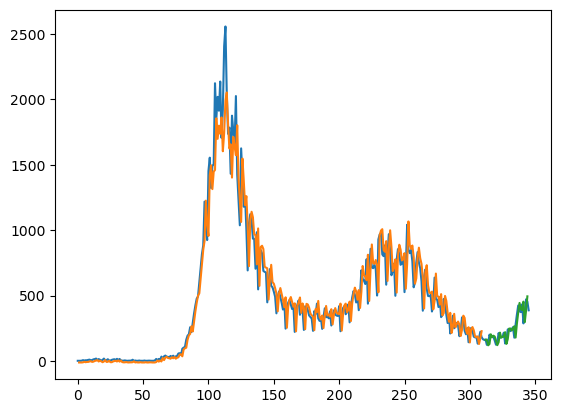

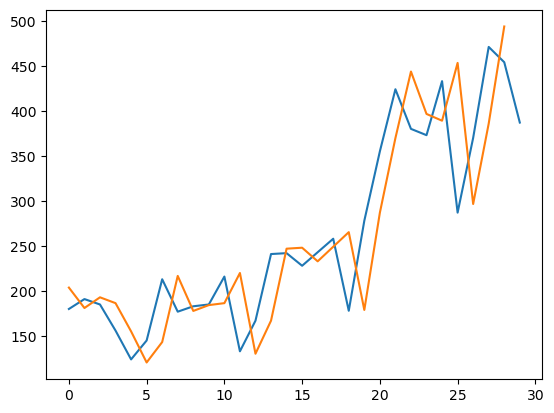

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="keelung_rnn+lstm_5000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('keelung_rnn+lstm_5000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('keelung_rnn+lstm_5000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("keelung_rnn+lstm_5000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

Epoch 52/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.6725e-04 - val_mse: 7.6724e-04
Epoch 53/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.1111e-04 - val_mse: 7.1111e-04
Epoch 54/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.7973e-04 - val_mse: 6.7973e-04
Epoch 55/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.7902e-04 - val_mse: 6.7902e-04
Epoch 56/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.9161e-04 - val_mse: 6.9161e-04
Epoch 57/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.6577e-04 - val_mse: 6.6577e-04
Epoch 58/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.9929e-04 - val_mse: 6.9929e-04
Epoch 59/5000

31/31 [==============================] - 0s 14ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 4.8623e-04 - val_mse: 4.8623e-04
Epoch 111/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 5.0495e-04 - val_mse: 5.0495e-04
Epoch 112/5000
31/31 [==============================] - 0s 16ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 4.7219e-04 - val_mse: 4.7219e-04
Epoch 113/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.7397e-04 - val_mse: 4.7397e-04
Epoch 114/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.8931e-04 - val_mse: 4.8931e-04
Epoch 115/5000
31/31 [==============================] - 0s 14ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.7593e-04 - val_mse: 4.7593e-04
Epoch 116/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.7944e-04 - val_mse: 4.7944e-04
Epoch 117/5000
31/

Epoch 168/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.6810e-04 - val_mse: 4.6810e-04
Epoch 169/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.6941e-04 - val_mse: 4.6941e-04
Epoch 170/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.6855e-04 - val_mse: 4.6855e-04
Epoch 171/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.6895e-04 - val_mse: 4.6895e-04
Epoch 172/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.6887e-04 - val_mse: 4.6887e-04
Epoch 173/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.6889e-04 - val_mse: 4.6889e-04
Epoch 174/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.6859e-04 - val_mse: 4.6859e-04
Epoch 

Epoch 226/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.6792e-04 - val_mse: 4.6792e-04
Epoch 227/5000
31/31 [==============================] - 0s 10ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.6716e-04 - val_mse: 4.6716e-04
Epoch 228/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.7196e-04 - val_mse: 4.7196e-04
Epoch 229/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.6946e-04 - val_mse: 4.6946e-04
Epoch 230/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.6965e-04 - val_mse: 4.6965e-04
Epoch 231/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.7870e-04 - val_mse: 4.7870e-04
Epoch 232/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.7134e-04 - val_mse: 4.7134e-04
Epoch

Epoch 284/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.7411e-04 - val_mse: 4.7411e-04
Epoch 285/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8165e-04 - val_mse: 4.8165e-04
Epoch 286/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7849e-04 - val_mse: 4.7849e-04
Epoch 287/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7805e-04 - val_mse: 4.7805e-04
Epoch 288/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.7847e-04 - val_mse: 4.7847e-04
Epoch 289/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7496e-04 - val_mse: 4.7496e-04
Epoch 290/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8247e-04 - val_mse: 4.8247e-04
Epoch 

Epoch 342/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9390e-04 - val_mse: 4.9390e-04
Epoch 343/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0221e-04 - val_mse: 5.0221e-04
Epoch 344/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0561e-04 - val_mse: 5.0561e-04
Epoch 345/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7906e-04 - val_mse: 4.7906e-04
Epoch 346/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8454e-04 - val_mse: 4.8454e-04
Epoch 347/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8913e-04 - val_mse: 4.8913e-04
Epoch 348/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9632e-04 - val_mse: 4.9632e-04
Epoch 

Epoch 400/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9341e-04 - val_mse: 4.9341e-04
Epoch 401/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7537e-04 - val_mse: 4.7537e-04
Epoch 402/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8206e-04 - val_mse: 4.8206e-04
Epoch 403/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8538e-04 - val_mse: 4.8538e-04
Epoch 404/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8213e-04 - val_mse: 4.8213e-04
Epoch 405/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8680e-04 - val_mse: 4.8680e-04
Epoch 406/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8063e-04 - val_mse: 4.8063e-04
Epoch 

Epoch 458/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9019e-04 - val_mse: 4.9019e-04
Epoch 459/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0204e-04 - val_mse: 5.0204e-04
Epoch 460/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8968e-04 - val_mse: 4.8968e-04
Epoch 461/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9798e-04 - val_mse: 4.9798e-04
Epoch 462/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8673e-04 - val_mse: 4.8673e-04
Epoch 463/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7686e-04 - val_mse: 4.7686e-04
Epoch 464/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8324e-04 - val_mse: 4.8324e-04
Epoch 

Epoch 516/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7919e-04 - val_mse: 4.7919e-04
Epoch 517/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.1631e-04 - val_mse: 5.1631e-04
Epoch 518/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8620e-04 - val_mse: 4.8620e-04
Epoch 519/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9843e-04 - val_mse: 4.9843e-04
Epoch 520/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0807e-04 - val_mse: 5.0807e-04
Epoch 521/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0755e-04 - val_mse: 5.0755e-04
Epoch 522/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9807e-04 - val_mse: 4.9807e-04
Epoch 

Epoch 574/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0045e-04 - val_mse: 5.0045e-04
Epoch 575/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8689e-04 - val_mse: 4.8689e-04
Epoch 576/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9515e-04 - val_mse: 4.9515e-04
Epoch 577/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9682e-04 - val_mse: 4.9682e-04
Epoch 578/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9702e-04 - val_mse: 4.9702e-04
Epoch 579/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9071e-04 - val_mse: 4.9071e-04
Epoch 580/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9191e-04 - val_mse: 4.9191e-04
Epoch 

Epoch 632/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0426e-04 - val_mse: 5.0426e-04
Epoch 633/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0278e-04 - val_mse: 5.0278e-04
Epoch 634/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9008e-04 - val_mse: 4.9008e-04
Epoch 635/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9280e-04 - val_mse: 4.9280e-04
Epoch 636/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9543e-04 - val_mse: 4.9543e-04
Epoch 637/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8769e-04 - val_mse: 4.8769e-04
Epoch 638/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0414e-04 - val_mse: 5.0414e-04
Epoch 

Epoch 690/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.1863e-04 - val_mse: 5.1863e-04
Epoch 691/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0212e-04 - val_mse: 5.0212e-04
Epoch 692/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9297e-04 - val_mse: 4.9297e-04
Epoch 693/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0722e-04 - val_mse: 5.0722e-04
Epoch 694/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0196e-04 - val_mse: 5.0196e-04
Epoch 695/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.1634e-04 - val_mse: 5.1634e-04
Epoch 696/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9573e-04 - val_mse: 4.9573e-04
Epoch 

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0783e-04 - val_mse: 5.0783e-04
Epoch 748/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0285e-04 - val_mse: 5.0285e-04
Epoch 749/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1172e-04 - val_mse: 5.1172e-04
Epoch 750/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9635e-04 - val_mse: 4.9635e-04
Epoch 751/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0050e-04 - val_mse: 5.0050e-04
Epoch 752/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9169e-04 - val_mse: 4.9169e-04
Epoch 753/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9219e-04 - val_mse: 4.9219e-04
Epoch 754/5000
31/31 

Epoch 805/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2078e-04 - val_mse: 5.2078e-04
Epoch 806/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2447e-04 - val_mse: 5.2447e-04
Epoch 807/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9660e-04 - val_mse: 4.9660e-04
Epoch 808/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0255e-04 - val_mse: 5.0255e-04
Epoch 809/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0320e-04 - val_mse: 5.0320e-04
Epoch 810/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1841e-04 - val_mse: 5.1841e-04
Epoch 811/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0735e-04 - val_mse: 5.0735e-04
Epoch 

Epoch 863/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9405e-04 - val_mse: 4.9405e-04
Epoch 864/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9186e-04 - val_mse: 4.9186e-04
Epoch 865/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.3481e-04 - val_mse: 5.3481e-04
Epoch 866/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1778e-04 - val_mse: 5.1778e-04
Epoch 867/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1882e-04 - val_mse: 5.1882e-04
Epoch 868/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0666e-04 - val_mse: 5.0666e-04
Epoch 869/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0249e-04 - val_mse: 5.0249e-04
Epoch 

Epoch 921/5000
31/31 [==============================] - 0s 10ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0138e-04 - val_mse: 5.0138e-04
Epoch 922/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.3879e-04 - val_mse: 5.3879e-04
Epoch 923/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8752e-04 - val_mse: 4.8752e-04
Epoch 924/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0686e-04 - val_mse: 5.0686e-04
Epoch 925/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1843e-04 - val_mse: 5.1843e-04
Epoch 926/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1217e-04 - val_mse: 5.1217e-04
Epoch 927/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9929e-04 - val_mse: 4.9929e-04
Epoch

Epoch 979/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0607e-04 - val_mse: 5.0607e-04
Epoch 980/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8949e-04 - val_mse: 4.8949e-04
Epoch 981/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9716e-04 - val_mse: 4.9716e-04
Epoch 982/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8576e-04 - val_mse: 4.8576e-04
Epoch 983/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2709e-04 - val_mse: 5.2709e-04
Epoch 984/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1598e-04 - val_mse: 5.1598e-04
Epoch 985/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0234e-04 - val_mse: 5.0234e-04
Epoch 

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2664e-04 - val_mse: 5.2664e-04
Epoch 1037/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0903e-04 - val_mse: 5.0903e-04
Epoch 1038/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1011e-04 - val_mse: 5.1011e-04
Epoch 1039/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9251e-04 - val_mse: 4.9251e-04
Epoch 1040/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1121e-04 - val_mse: 5.1121e-04
Epoch 1041/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1775e-04 - val_mse: 5.1775e-04
Epoch 1042/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9899e-04 - val_mse: 4.9899e-04
Epoch 1043/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0257e-04 - val_mse: 5.0257e-04
Epoch 1094/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9574e-04 - val_mse: 4.9574e-04
Epoch 1095/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1318e-04 - val_mse: 5.1318e-04
Epoch 1096/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9609e-04 - val_mse: 4.9609e-04
Epoch 1097/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0024e-04 - val_mse: 5.0024e-04
Epoch 1098/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3296e-04 - val_mse: 5.3296e-04
Epoch 1099/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9154e-04 - val_mse: 4.9154e-04
Epoch 1100/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8945e-04 - val_mse: 4.8945e-04
Epoch 1151/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.1598e-04 - val_mse: 5.1598e-04
Epoch 1152/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2557e-04 - val_mse: 5.2557e-04
Epoch 1153/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1657e-04 - val_mse: 5.1657e-04
Epoch 1154/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1009e-04 - val_mse: 5.1009e-04
Epoch 1155/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9188e-04 - val_mse: 4.9188e-04
Epoch 1156/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9434e-04 - val_mse: 4.9434e-04
Epoch 1157/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3776e-04 - val_mse: 5.3776e-04
Epoch 1208/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3511e-04 - val_mse: 5.3511e-04
Epoch 1209/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0540e-04 - val_mse: 5.0540e-04
Epoch 1210/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1089e-04 - val_mse: 5.1089e-04
Epoch 1211/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1437e-04 - val_mse: 5.1437e-04
Epoch 1212/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0799e-04 - val_mse: 5.0799e-04
Epoch 1213/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0262e-04 - val_mse: 5.0262e-04
Epoch 1214/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0984e-04 - val_mse: 5.0984e-04
Epoch 1265/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0643e-04 - val_mse: 5.0643e-04
Epoch 1266/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9547e-04 - val_mse: 4.9547e-04
Epoch 1267/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9904e-04 - val_mse: 4.9904e-04
Epoch 1268/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.3298e-04 - val_mse: 5.3298e-04
Epoch 1269/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0889e-04 - val_mse: 5.0889e-04
Epoch 1270/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1923e-04 - val_mse: 5.1923e-04
Epoch 1271/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0446e-04 - val_mse: 5.0446e-04
Epoch 1322/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9171e-04 - val_mse: 4.9171e-04
Epoch 1323/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9802e-04 - val_mse: 4.9802e-04
Epoch 1324/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2035e-04 - val_mse: 5.2035e-04
Epoch 1325/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9751e-04 - val_mse: 4.9751e-04
Epoch 1326/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0672e-04 - val_mse: 5.0672e-04
Epoch 1327/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.1704e-04 - val_mse: 5.1704e-04
Epoch 1328/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0729e-04 - val_mse: 5.0729e-04
Epoch 1379/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9788e-04 - val_mse: 4.9788e-04
Epoch 1380/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0191e-04 - val_mse: 5.0191e-04
Epoch 1381/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3447e-04 - val_mse: 5.3447e-04
Epoch 1382/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2171e-04 - val_mse: 5.2171e-04
Epoch 1383/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0034e-04 - val_mse: 5.0034e-04
Epoch 1384/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2796e-04 - val_mse: 5.2796e-04
Epoch 1385/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1185e-04 - val_mse: 5.1185e-04
Epoch 1436/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0458e-04 - val_mse: 5.0458e-04
Epoch 1437/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1447e-04 - val_mse: 5.1447e-04
Epoch 1438/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0513e-04 - val_mse: 5.0513e-04
Epoch 1439/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1862e-04 - val_mse: 5.1862e-04
Epoch 1440/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1460e-04 - val_mse: 5.1460e-04
Epoch 1441/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1344e-04 - val_mse: 5.1344e-04
Epoch 1442/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3006e-04 - val_mse: 5.3006e-04
Epoch 1493/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1737e-04 - val_mse: 5.1737e-04
Epoch 1494/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0919e-04 - val_mse: 5.0919e-04
Epoch 1495/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1155e-04 - val_mse: 5.1155e-04
Epoch 1496/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0718e-04 - val_mse: 5.0718e-04
Epoch 1497/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1818e-04 - val_mse: 5.1818e-04
Epoch 1498/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9548e-04 - val_mse: 4.9548e-04
Epoch 1499/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1278e-04 - val_mse: 5.1278e-04
Epoch 1550/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2069e-04 - val_mse: 5.2069e-04
Epoch 1551/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1950e-04 - val_mse: 5.1950e-04
Epoch 1552/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8732e-04 - val_mse: 4.8732e-04
Epoch 1553/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9154e-04 - val_mse: 4.9154e-04
Epoch 1554/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1924e-04 - val_mse: 5.1924e-04
Epoch 1555/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9981e-04 - val_mse: 4.9981e-04
Epoch 1556/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0489e-04 - val_mse: 5.0489e-04
Epoch 1607/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9439e-04 - val_mse: 4.9439e-04
Epoch 1608/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0153e-04 - val_mse: 5.0153e-04
Epoch 1609/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0932e-04 - val_mse: 5.0932e-04
Epoch 1610/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0617e-04 - val_mse: 5.0617e-04
Epoch 1611/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0532e-04 - val_mse: 5.0532e-04
Epoch 1612/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0808e-04 - val_mse: 5.0808e-04
Epoch 1613/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9785e-04 - val_mse: 4.9785e-04
Epoch 1664/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3126e-04 - val_mse: 5.3126e-04
Epoch 1665/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0379e-04 - val_mse: 5.0379e-04
Epoch 1666/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0219e-04 - val_mse: 5.0219e-04
Epoch 1667/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0399e-04 - val_mse: 5.0399e-04
Epoch 1668/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8458e-04 - val_mse: 4.8458e-04
Epoch 1669/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2667e-04 - val_mse: 5.2667e-04
Epoch 1670/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8975e-04 - val_mse: 4.8975e-04
Epoch 1721/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3633e-04 - val_mse: 5.3633e-04
Epoch 1722/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1028e-04 - val_mse: 5.1028e-04
Epoch 1723/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0558e-04 - val_mse: 5.0558e-04
Epoch 1724/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1591e-04 - val_mse: 5.1591e-04
Epoch 1725/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2315e-04 - val_mse: 5.2315e-04
Epoch 1726/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1006e-04 - val_mse: 5.1006e-04
Epoch 1727/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1567e-04 - val_mse: 5.1567e-04
Epoch 1778/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1485e-04 - val_mse: 5.1485e-04
Epoch 1779/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1187e-04 - val_mse: 5.1187e-04
Epoch 1780/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0982e-04 - val_mse: 5.0982e-04
Epoch 1781/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1004e-04 - val_mse: 5.1004e-04
Epoch 1782/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0037e-04 - val_mse: 5.0037e-04
Epoch 1783/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0250e-04 - val_mse: 5.0250e-04
Epoch 1784/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1251e-04 - val_mse: 5.1251e-04
Epoch 1835/5000
31/31 [==============================] - 0s 11ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1965e-04 - val_mse: 5.1965e-04
Epoch 1836/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9789e-04 - val_mse: 4.9789e-04
Epoch 1837/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1009e-04 - val_mse: 5.1009e-04
Epoch 1838/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.4166e-04 - val_mse: 5.4166e-04
Epoch 1839/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0449e-04 - val_mse: 5.0449e-04
Epoch 1840/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1631e-04 - val_mse: 5.1631e-04
Epoch 1841/500

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0027e-04 - val_mse: 5.0027e-04
Epoch 1892/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2024e-04 - val_mse: 5.2024e-04
Epoch 1893/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2142e-04 - val_mse: 5.2142e-04
Epoch 1894/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9640e-04 - val_mse: 4.9640e-04
Epoch 1895/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1562e-04 - val_mse: 5.1562e-04
Epoch 1896/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0015e-04 - val_mse: 5.0015e-04
Epoch 1897/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2413e-04 - val_mse: 5.2413e-04
Epoch 1898/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9631e-04 - val_mse: 4.9631e-04
Epoch 1949/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0852e-04 - val_mse: 5.0852e-04
Epoch 1950/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0773e-04 - val_mse: 5.0773e-04
Epoch 1951/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0548e-04 - val_mse: 5.0548e-04
Epoch 1952/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1608e-04 - val_mse: 5.1608e-04
Epoch 1953/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2027e-04 - val_mse: 5.2027e-04
Epoch 1954/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9254e-04 - val_mse: 4.9254e-04
Epoch 1955/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1618e-04 - val_mse: 5.1618e-04
Epoch 2006/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2368e-04 - val_mse: 5.2368e-04
Epoch 2007/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0691e-04 - val_mse: 5.0691e-04
Epoch 2008/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1525e-04 - val_mse: 5.1525e-04
Epoch 2009/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2209e-04 - val_mse: 5.2209e-04
Epoch 2010/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3053e-04 - val_mse: 5.3053e-04
Epoch 2011/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3639e-04 - val_mse: 5.3639e-04
Epoch 2012/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0095e-04 - val_mse: 5.0095e-04
Epoch 2063/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1574e-04 - val_mse: 5.1574e-04
Epoch 2064/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1678e-04 - val_mse: 5.1678e-04
Epoch 2065/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0483e-04 - val_mse: 5.0483e-04
Epoch 2066/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2373e-04 - val_mse: 5.2373e-04
Epoch 2067/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1662e-04 - val_mse: 5.1662e-04
Epoch 2068/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1936e-04 - val_mse: 5.1936e-04
Epoch 2069/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9772e-04 - val_mse: 4.9772e-04
Epoch 2120/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2543e-04 - val_mse: 5.2543e-04
Epoch 2121/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.5447e-04 - val_mse: 5.5447e-04
Epoch 2122/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0375e-04 - val_mse: 5.0375e-04
Epoch 2123/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2340e-04 - val_mse: 5.2340e-04
Epoch 2124/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0533e-04 - val_mse: 5.0533e-04
Epoch 2125/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2110e-04 - val_mse: 5.2110e-04
Epoch 2126/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0583e-04 - val_mse: 5.0583e-04
Epoch 2177/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1869e-04 - val_mse: 5.1869e-04
Epoch 2178/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2756e-04 - val_mse: 5.2756e-04
Epoch 2179/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2845e-04 - val_mse: 5.2845e-04
Epoch 2180/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2043e-04 - val_mse: 5.2043e-04
Epoch 2181/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0353e-04 - val_mse: 5.0353e-04
Epoch 2182/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0910e-04 - val_mse: 5.0910e-04
Epoch 2183/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2620e-04 - val_mse: 5.2620e-04
Epoch 2234/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1892e-04 - val_mse: 5.1892e-04
Epoch 2235/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0806e-04 - val_mse: 5.0806e-04
Epoch 2236/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3134e-04 - val_mse: 5.3134e-04
Epoch 2237/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1243e-04 - val_mse: 5.1243e-04
Epoch 2238/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1401e-04 - val_mse: 5.1401e-04
Epoch 2239/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.4072e-04 - val_mse: 5.4072e-04
Epoch 2240/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2055e-04 - val_mse: 5.2055e-04
Epoch 2291/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0486e-04 - val_mse: 5.0486e-04
Epoch 2292/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1507e-04 - val_mse: 5.1507e-04
Epoch 2293/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1454e-04 - val_mse: 5.1454e-04
Epoch 2294/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2077e-04 - val_mse: 5.2077e-04
Epoch 2295/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9326e-04 - val_mse: 4.9326e-04
Epoch 2296/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0544e-04 - val_mse: 5.0544e-04
Epoch 2297/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0364e-04 - val_mse: 5.0364e-04
Epoch 2348/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2410e-04 - val_mse: 5.2410e-04
Epoch 2349/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1269e-04 - val_mse: 5.1269e-04
Epoch 2350/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0565e-04 - val_mse: 5.0565e-04
Epoch 2351/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2754e-04 - val_mse: 5.2754e-04
Epoch 2352/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2224e-04 - val_mse: 5.2224e-04
Epoch 2353/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0610e-04 - val_mse: 5.0610e-04
Epoch 2354/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1662e-04 - val_mse: 5.1662e-04
Epoch 2405/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1353e-04 - val_mse: 5.1353e-04
Epoch 2406/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9345e-04 - val_mse: 4.9345e-04
Epoch 2407/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3932e-04 - val_mse: 5.3932e-04
Epoch 2408/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0472e-04 - val_mse: 5.0472e-04
Epoch 2409/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9843e-04 - val_mse: 4.9843e-04
Epoch 2410/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0850e-04 - val_mse: 5.0850e-04
Epoch 2411/5000

31/31 [==============================] - 0s 10ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.4256e-04 - val_mse: 5.4256e-04
Epoch 2462/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9091e-04 - val_mse: 4.9091e-04
Epoch 2463/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1143e-04 - val_mse: 5.1143e-04
Epoch 2464/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1343e-04 - val_mse: 5.1343e-04
Epoch 2465/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2139e-04 - val_mse: 5.2139e-04
Epoch 2466/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2168e-04 - val_mse: 5.2168e-04
Epoch 2467/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1576e-04 - val_mse: 5.1576e-04
Epoch 2468/500

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0639e-04 - val_mse: 5.0639e-04
Epoch 2519/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.4087e-04 - val_mse: 5.4087e-04
Epoch 2520/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8863e-04 - val_mse: 4.8863e-04
Epoch 2521/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1102e-04 - val_mse: 5.1102e-04
Epoch 2522/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9661e-04 - val_mse: 4.9661e-04
Epoch 2523/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3361e-04 - val_mse: 5.3361e-04
Epoch 2524/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2299e-04 - val_mse: 5.2299e-04
Epoch 2525/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0860e-04 - val_mse: 5.0860e-04
Epoch 2576/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2404e-04 - val_mse: 5.2404e-04
Epoch 2577/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1622e-04 - val_mse: 5.1622e-04
Epoch 2578/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2452e-04 - val_mse: 5.2452e-04
Epoch 2579/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0684e-04 - val_mse: 5.0684e-04
Epoch 2580/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1249e-04 - val_mse: 5.1249e-04
Epoch 2581/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2763e-04 - val_mse: 5.2763e-04
Epoch 2582/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0608e-04 - val_mse: 5.0608e-04
Epoch 2633/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9476e-04 - val_mse: 4.9476e-04
Epoch 2634/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2301e-04 - val_mse: 5.2301e-04
Epoch 2635/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9304e-04 - val_mse: 4.9304e-04
Epoch 2636/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0977e-04 - val_mse: 5.0977e-04
Epoch 2637/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1289e-04 - val_mse: 5.1289e-04
Epoch 2638/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2119e-04 - val_mse: 5.2119e-04
Epoch 2639/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1374e-04 - val_mse: 5.1374e-04
Epoch 2690/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1818e-04 - val_mse: 5.1818e-04
Epoch 2691/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2664e-04 - val_mse: 5.2664e-04
Epoch 2692/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9267e-04 - val_mse: 4.9267e-04
Epoch 2693/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2171e-04 - val_mse: 5.2171e-04
Epoch 2694/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1023e-04 - val_mse: 5.1023e-04
Epoch 2695/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0743e-04 - val_mse: 5.0743e-04
Epoch 2696/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1485e-04 - val_mse: 5.1485e-04
Epoch 2747/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0739e-04 - val_mse: 5.0739e-04
Epoch 2748/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2940e-04 - val_mse: 5.2940e-04
Epoch 2749/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2043e-04 - val_mse: 5.2043e-04
Epoch 2750/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1023e-04 - val_mse: 5.1023e-04
Epoch 2751/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3198e-04 - val_mse: 5.3198e-04
Epoch 2752/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1038e-04 - val_mse: 5.1038e-04
Epoch 2753/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2568e-04 - val_mse: 5.2568e-04
Epoch 2804/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3039e-04 - val_mse: 5.3039e-04
Epoch 2805/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9338e-04 - val_mse: 4.9338e-04
Epoch 2806/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0869e-04 - val_mse: 5.0869e-04
Epoch 2807/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2610e-04 - val_mse: 5.2610e-04
Epoch 2808/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0235e-04 - val_mse: 5.0235e-04
Epoch 2809/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0556e-04 - val_mse: 5.0556e-04
Epoch 2810/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1166e-04 - val_mse: 5.1166e-04
Epoch 2861/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0052e-04 - val_mse: 5.0052e-04
Epoch 2862/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0287e-04 - val_mse: 5.0287e-04
Epoch 2863/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0734e-04 - val_mse: 5.0734e-04
Epoch 2864/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3700e-04 - val_mse: 5.3700e-04
Epoch 2865/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1606e-04 - val_mse: 5.1606e-04
Epoch 2866/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2261e-04 - val_mse: 5.2261e-04
Epoch 2867/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3585e-04 - val_mse: 5.3585e-04
Epoch 2918/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1356e-04 - val_mse: 5.1356e-04
Epoch 2919/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9918e-04 - val_mse: 4.9918e-04
Epoch 2920/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0930e-04 - val_mse: 5.0930e-04
Epoch 2921/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.4485e-04 - val_mse: 5.4485e-04
Epoch 2922/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2470e-04 - val_mse: 5.2470e-04
Epoch 2923/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0719e-04 - val_mse: 5.0719e-04
Epoch 2924/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1517e-04 - val_mse: 5.1517e-04
Epoch 2975/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0980e-04 - val_mse: 5.0980e-04
Epoch 2976/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9591e-04 - val_mse: 4.9591e-04
Epoch 2977/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2297e-04 - val_mse: 5.2297e-04
Epoch 2978/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1739e-04 - val_mse: 5.1739e-04
Epoch 2979/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1365e-04 - val_mse: 5.1365e-04
Epoch 2980/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0740e-04 - val_mse: 5.0740e-04
Epoch 2981/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0640e-04 - val_mse: 5.0640e-04
Epoch 3032/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0008e-04 - val_mse: 5.0008e-04
Epoch 3033/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1946e-04 - val_mse: 5.1946e-04
Epoch 3034/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1012e-04 - val_mse: 5.1012e-04
Epoch 3035/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2174e-04 - val_mse: 5.2174e-04
Epoch 3036/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0041e-04 - val_mse: 5.0041e-04
Epoch 3037/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0549e-04 - val_mse: 5.0549e-04
Epoch 3038/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1673e-04 - val_mse: 5.1673e-04
Epoch 3089/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0774e-04 - val_mse: 5.0774e-04
Epoch 3090/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1651e-04 - val_mse: 5.1651e-04
Epoch 3091/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1157e-04 - val_mse: 5.1157e-04
Epoch 3092/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1066e-04 - val_mse: 5.1066e-04
Epoch 3093/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0995e-04 - val_mse: 5.0995e-04
Epoch 3094/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0813e-04 - val_mse: 5.0813e-04
Epoch 3095/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9967e-04 - val_mse: 4.9967e-04
Epoch 3146/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2718e-04 - val_mse: 5.2718e-04
Epoch 3147/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1349e-04 - val_mse: 5.1349e-04
Epoch 3148/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9909e-04 - val_mse: 4.9909e-04
Epoch 3149/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1146e-04 - val_mse: 5.1146e-04
Epoch 3150/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0910e-04 - val_mse: 5.0910e-04
Epoch 3151/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1954e-04 - val_mse: 5.1954e-04
Epoch 3152/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0691e-04 - val_mse: 5.0691e-04
Epoch 3203/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3536e-04 - val_mse: 5.3536e-04
Epoch 3204/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1976e-04 - val_mse: 5.1976e-04
Epoch 3205/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1248e-04 - val_mse: 5.1248e-04
Epoch 3206/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9714e-04 - val_mse: 4.9714e-04
Epoch 3207/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9901e-04 - val_mse: 4.9901e-04
Epoch 3208/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0503e-04 - val_mse: 5.0503e-04
Epoch 3209/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.4357e-04 - val_mse: 5.4357e-04
Epoch 3260/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0781e-04 - val_mse: 5.0781e-04
Epoch 3261/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1214e-04 - val_mse: 5.1214e-04
Epoch 3262/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0165e-04 - val_mse: 5.0165e-04
Epoch 3263/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1239e-04 - val_mse: 5.1239e-04
Epoch 3264/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2337e-04 - val_mse: 5.2337e-04
Epoch 3265/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2952e-04 - val_mse: 5.2952e-04
Epoch 3266/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9187e-04 - val_mse: 4.9187e-04
Epoch 3317/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1034e-04 - val_mse: 5.1034e-04
Epoch 3318/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0075e-04 - val_mse: 5.0075e-04
Epoch 3319/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2210e-04 - val_mse: 5.2210e-04
Epoch 3320/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2264e-04 - val_mse: 5.2264e-04
Epoch 3321/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1965e-04 - val_mse: 5.1965e-04
Epoch 3322/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3502e-04 - val_mse: 5.3502e-04
Epoch 3323/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1835e-04 - val_mse: 5.1835e-04
Epoch 3374/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0604e-04 - val_mse: 5.0604e-04
Epoch 3375/5000
31/31 [==============================] - 0s 10ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2934e-04 - val_mse: 5.2934e-04
Epoch 3376/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1040e-04 - val_mse: 5.1040e-04
Epoch 3377/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2283e-04 - val_mse: 5.2283e-04
Epoch 3378/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9760e-04 - val_mse: 4.9760e-04
Epoch 3379/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2545e-04 - val_mse: 5.2545e-04
Epoch 3380/500

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3781e-04 - val_mse: 5.3780e-04
Epoch 3431/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2013e-04 - val_mse: 5.2013e-04
Epoch 3432/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2810e-04 - val_mse: 5.2810e-04
Epoch 3433/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0067e-04 - val_mse: 5.0067e-04
Epoch 3434/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9287e-04 - val_mse: 4.9287e-04
Epoch 3435/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1735e-04 - val_mse: 5.1735e-04
Epoch 3436/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0683e-04 - val_mse: 5.0683e-04
Epoch 3437/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2275e-04 - val_mse: 5.2275e-04
Epoch 3488/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3546e-04 - val_mse: 5.3546e-04
Epoch 3489/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0579e-04 - val_mse: 5.0579e-04
Epoch 3490/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0676e-04 - val_mse: 5.0676e-04
Epoch 3491/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2868e-04 - val_mse: 5.2868e-04
Epoch 3492/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0973e-04 - val_mse: 5.0973e-04
Epoch 3493/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1739e-04 - val_mse: 5.1739e-04
Epoch 3494/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0384e-04 - val_mse: 5.0384e-04
Epoch 3545/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1555e-04 - val_mse: 5.1555e-04
Epoch 3546/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3074e-04 - val_mse: 5.3074e-04
Epoch 3547/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1644e-04 - val_mse: 5.1644e-04
Epoch 3548/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1477e-04 - val_mse: 5.1477e-04
Epoch 3549/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0921e-04 - val_mse: 5.0921e-04
Epoch 3550/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1418e-04 - val_mse: 5.1418e-04
Epoch 3551/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2958e-04 - val_mse: 5.2958e-04
Epoch 3602/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3874e-04 - val_mse: 5.3874e-04
Epoch 3603/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9622e-04 - val_mse: 4.9622e-04
Epoch 3604/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1091e-04 - val_mse: 5.1091e-04
Epoch 3605/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0902e-04 - val_mse: 5.0902e-04
Epoch 3606/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0207e-04 - val_mse: 5.0207e-04
Epoch 3607/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0576e-04 - val_mse: 5.0576e-04
Epoch 3608/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1216e-04 - val_mse: 5.1216e-04
Epoch 3659/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0205e-04 - val_mse: 5.0205e-04
Epoch 3660/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1398e-04 - val_mse: 5.1398e-04
Epoch 3661/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1130e-04 - val_mse: 5.1130e-04
Epoch 3662/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0226e-04 - val_mse: 5.0226e-04
Epoch 3663/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1607e-04 - val_mse: 5.1607e-04
Epoch 3664/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1383e-04 - val_mse: 5.1383e-04
Epoch 3665/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3433e-04 - val_mse: 5.3433e-04
Epoch 3716/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0888e-04 - val_mse: 5.0888e-04
Epoch 3717/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1687e-04 - val_mse: 5.1687e-04
Epoch 3718/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9793e-04 - val_mse: 4.9793e-04
Epoch 3719/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3692e-04 - val_mse: 5.3692e-04
Epoch 3720/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0227e-04 - val_mse: 5.0227e-04
Epoch 3721/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3273e-04 - val_mse: 5.3273e-04
Epoch 3722/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3525e-04 - val_mse: 5.3525e-04
Epoch 3773/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1889e-04 - val_mse: 5.1889e-04
Epoch 3774/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0620e-04 - val_mse: 5.0620e-04
Epoch 3775/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2543e-04 - val_mse: 5.2543e-04
Epoch 3776/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0532e-04 - val_mse: 5.0532e-04
Epoch 3777/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1949e-04 - val_mse: 5.1949e-04
Epoch 3778/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2794e-04 - val_mse: 5.2794e-04
Epoch 3779/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0651e-04 - val_mse: 5.0651e-04
Epoch 3830/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1368e-04 - val_mse: 5.1368e-04
Epoch 3831/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1912e-04 - val_mse: 5.1912e-04
Epoch 3832/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2208e-04 - val_mse: 5.2208e-04
Epoch 3833/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9334e-04 - val_mse: 4.9334e-04
Epoch 3834/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2275e-04 - val_mse: 5.2275e-04
Epoch 3835/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2746e-04 - val_mse: 5.2746e-04
Epoch 3836/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1109e-04 - val_mse: 5.1109e-04
Epoch 3887/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0880e-04 - val_mse: 5.0880e-04
Epoch 3888/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0524e-04 - val_mse: 5.0524e-04
Epoch 3889/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1286e-04 - val_mse: 5.1286e-04
Epoch 3890/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0625e-04 - val_mse: 5.0625e-04
Epoch 3891/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0624e-04 - val_mse: 5.0624e-04
Epoch 3892/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3364e-04 - val_mse: 5.3364e-04
Epoch 3893/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0566e-04 - val_mse: 5.0566e-04
Epoch 3944/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0823e-04 - val_mse: 5.0823e-04
Epoch 3945/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1739e-04 - val_mse: 5.1739e-04
Epoch 3946/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9819e-04 - val_mse: 4.9819e-04
Epoch 3947/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0701e-04 - val_mse: 5.0701e-04
Epoch 3948/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1171e-04 - val_mse: 5.1171e-04
Epoch 3949/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1918e-04 - val_mse: 5.1918e-04
Epoch 3950/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2694e-04 - val_mse: 5.2694e-04
Epoch 4001/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0198e-04 - val_mse: 5.0198e-04
Epoch 4002/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0899e-04 - val_mse: 5.0899e-04
Epoch 4003/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9595e-04 - val_mse: 4.9595e-04
Epoch 4004/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0573e-04 - val_mse: 5.0573e-04
Epoch 4005/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9679e-04 - val_mse: 4.9679e-04
Epoch 4006/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1280e-04 - val_mse: 5.1280e-04
Epoch 4007/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9610e-04 - val_mse: 4.9610e-04
Epoch 4058/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9073e-04 - val_mse: 4.9073e-04
Epoch 4059/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2338e-04 - val_mse: 5.2338e-04
Epoch 4060/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0130e-04 - val_mse: 5.0130e-04
Epoch 4061/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9955e-04 - val_mse: 4.9955e-04
Epoch 4062/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0047e-04 - val_mse: 5.0047e-04
Epoch 4063/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2187e-04 - val_mse: 5.2187e-04
Epoch 4064/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1601e-04 - val_mse: 5.1601e-04
Epoch 4115/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1795e-04 - val_mse: 5.1795e-04
Epoch 4116/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0148e-04 - val_mse: 5.0148e-04
Epoch 4117/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1413e-04 - val_mse: 5.1413e-04
Epoch 4118/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2286e-04 - val_mse: 5.2286e-04
Epoch 4119/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.5156e-04 - val_mse: 5.5156e-04
Epoch 4120/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0798e-04 - val_mse: 5.0798e-04
Epoch 4121/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0336e-04 - val_mse: 5.0336e-04
Epoch 4172/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1719e-04 - val_mse: 5.1719e-04
Epoch 4173/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2532e-04 - val_mse: 5.2532e-04
Epoch 4174/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0517e-04 - val_mse: 5.0517e-04
Epoch 4175/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0302e-04 - val_mse: 5.0302e-04
Epoch 4176/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1612e-04 - val_mse: 5.1612e-04
Epoch 4177/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1948e-04 - val_mse: 5.1948e-04
Epoch 4178/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1410e-04 - val_mse: 5.1410e-04
Epoch 4229/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0781e-04 - val_mse: 5.0781e-04
Epoch 4230/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9811e-04 - val_mse: 4.9811e-04
Epoch 4231/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9376e-04 - val_mse: 4.9376e-04
Epoch 4232/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1198e-04 - val_mse: 5.1198e-04
Epoch 4233/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1686e-04 - val_mse: 5.1686e-04
Epoch 4234/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1541e-04 - val_mse: 5.1541e-04
Epoch 4235/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0166e-04 - val_mse: 5.0166e-04
Epoch 4286/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0467e-04 - val_mse: 5.0467e-04
Epoch 4287/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1462e-04 - val_mse: 5.1462e-04
Epoch 4288/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2706e-04 - val_mse: 5.2706e-04
Epoch 4289/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1774e-04 - val_mse: 5.1774e-04
Epoch 4290/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1198e-04 - val_mse: 5.1198e-04
Epoch 4291/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1870e-04 - val_mse: 5.1870e-04
Epoch 4292/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1108e-04 - val_mse: 5.1108e-04
Epoch 4343/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2155e-04 - val_mse: 5.2155e-04
Epoch 4344/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0606e-04 - val_mse: 5.0606e-04
Epoch 4345/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2109e-04 - val_mse: 5.2109e-04
Epoch 4346/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0653e-04 - val_mse: 5.0653e-04
Epoch 4347/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1668e-04 - val_mse: 5.1668e-04
Epoch 4348/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1085e-04 - val_mse: 5.1085e-04
Epoch 4349/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2760e-04 - val_mse: 5.2760e-04
Epoch 4400/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3047e-04 - val_mse: 5.3047e-04
Epoch 4401/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9851e-04 - val_mse: 4.9851e-04
Epoch 4402/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1117e-04 - val_mse: 5.1117e-04
Epoch 4403/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3007e-04 - val_mse: 5.3007e-04
Epoch 4404/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2832e-04 - val_mse: 5.2832e-04
Epoch 4405/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9777e-04 - val_mse: 4.9777e-04
Epoch 4406/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0946e-04 - val_mse: 5.0946e-04
Epoch 4457/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1847e-04 - val_mse: 5.1847e-04
Epoch 4458/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9570e-04 - val_mse: 4.9570e-04
Epoch 4459/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2474e-04 - val_mse: 5.2474e-04
Epoch 4460/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2485e-04 - val_mse: 5.2485e-04
Epoch 4461/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1820e-04 - val_mse: 5.1820e-04
Epoch 4462/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1287e-04 - val_mse: 5.1287e-04
Epoch 4463/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0523e-04 - val_mse: 5.0523e-04
Epoch 4514/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9767e-04 - val_mse: 4.9767e-04
Epoch 4515/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1331e-04 - val_mse: 5.1331e-04
Epoch 4516/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9951e-04 - val_mse: 4.9951e-04
Epoch 4517/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2573e-04 - val_mse: 5.2573e-04
Epoch 4518/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1025e-04 - val_mse: 5.1025e-04
Epoch 4519/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2508e-04 - val_mse: 5.2508e-04
Epoch 4520/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0408e-04 - val_mse: 5.0408e-04
Epoch 4571/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0080e-04 - val_mse: 5.0080e-04
Epoch 4572/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3655e-04 - val_mse: 5.3655e-04
Epoch 4573/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3891e-04 - val_mse: 5.3891e-04
Epoch 4574/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1805e-04 - val_mse: 5.1805e-04
Epoch 4575/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2803e-04 - val_mse: 5.2803e-04
Epoch 4576/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1381e-04 - val_mse: 5.1381e-04
Epoch 4577/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1509e-04 - val_mse: 5.1509e-04
Epoch 4628/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1962e-04 - val_mse: 5.1962e-04
Epoch 4629/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0151e-04 - val_mse: 5.0151e-04
Epoch 4630/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8266e-04 - val_mse: 4.8266e-04
Epoch 4631/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1236e-04 - val_mse: 5.1236e-04
Epoch 4632/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1565e-04 - val_mse: 5.1565e-04
Epoch 4633/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1038e-04 - val_mse: 5.1038e-04
Epoch 4634/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0050e-04 - val_mse: 5.0050e-04
Epoch 4685/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0986e-04 - val_mse: 5.0986e-04
Epoch 4686/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1650e-04 - val_mse: 5.1650e-04
Epoch 4687/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3782e-04 - val_mse: 5.3782e-04
Epoch 4688/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9145e-04 - val_mse: 4.9145e-04
Epoch 4689/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.4426e-04 - val_mse: 5.4426e-04
Epoch 4690/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2202e-04 - val_mse: 5.2202e-04
Epoch 4691/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1672e-04 - val_mse: 5.1672e-04
Epoch 4742/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0534e-04 - val_mse: 5.0534e-04
Epoch 4743/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2014e-04 - val_mse: 5.2014e-04
Epoch 4744/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2110e-04 - val_mse: 5.2110e-04
Epoch 4745/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9787e-04 - val_mse: 4.9787e-04
Epoch 4746/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0959e-04 - val_mse: 5.0959e-04
Epoch 4747/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1675e-04 - val_mse: 5.1675e-04
Epoch 4748/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2845e-04 - val_mse: 5.2845e-04
Epoch 4799/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8967e-04 - val_mse: 4.8967e-04
Epoch 4800/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1190e-04 - val_mse: 5.1190e-04
Epoch 4801/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2924e-04 - val_mse: 5.2924e-04
Epoch 4802/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9708e-04 - val_mse: 4.9708e-04
Epoch 4803/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0346e-04 - val_mse: 5.0346e-04
Epoch 4804/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1078e-04 - val_mse: 5.1078e-04
Epoch 4805/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0860e-04 - val_mse: 5.0860e-04
Epoch 4856/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2498e-04 - val_mse: 5.2498e-04
Epoch 4857/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0983e-04 - val_mse: 5.0983e-04
Epoch 4858/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0024e-04 - val_mse: 5.0024e-04
Epoch 4859/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0476e-04 - val_mse: 5.0476e-04
Epoch 4860/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1611e-04 - val_mse: 5.1611e-04
Epoch 4861/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3080e-04 - val_mse: 5.3080e-04
Epoch 4862/5000

31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2105e-04 - val_mse: 5.2105e-04
Epoch 4913/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2438e-04 - val_mse: 5.2438e-04
Epoch 4914/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0879e-04 - val_mse: 5.0879e-04
Epoch 4915/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1655e-04 - val_mse: 5.1655e-04
Epoch 4916/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1349e-04 - val_mse: 5.1349e-04
Epoch 4917/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1650e-04 - val_mse: 5.1650e-04
Epoch 4918/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0848e-04 - val_mse: 5.0848e-04
Epoch 4919/5000

31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1157e-04 - val_mse: 5.1157e-04
Epoch 4970/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.3596e-04 - val_mse: 5.3596e-04
Epoch 4971/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2737e-04 - val_mse: 5.2737e-04
Epoch 4972/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9357e-04 - val_mse: 4.9357e-04
Epoch 4973/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1932e-04 - val_mse: 5.1932e-04
Epoch 4974/5000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1317e-04 - val_mse: 5.1317e-04
Epoch 4975/5000
31/31 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0704e-04 - val_mse: 5.0704e-04
Epoch 4976/5000

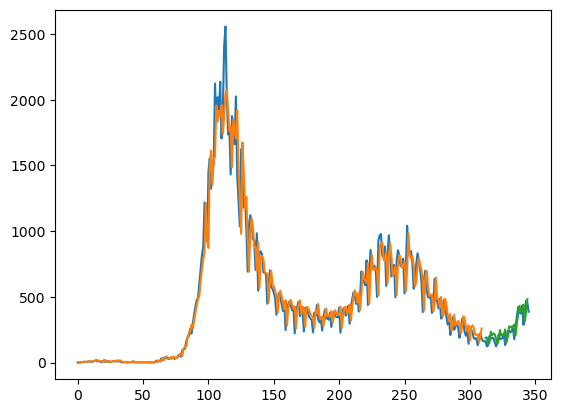

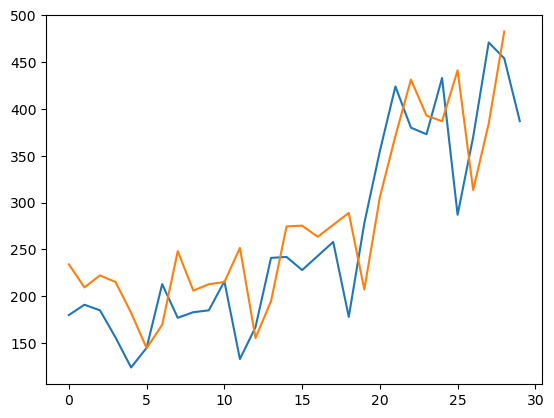

In [5]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="keelung_rnn+lstm_5000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('keelung_rnn+lstm_5000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('keelung_rnn+lstm_5000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("keelung_rnn+lstm_5000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_6 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)            

Epoch 51/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 52/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 53/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 54/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 55/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 56/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 57/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 58/5000
309/309 [==============================] 

Epoch 110/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 4.6134e-04 - val_mse: 4.6134e-04
Epoch 111/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 8.8685e-04 - val_mse: 8.8685e-04
Epoch 112/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 4.9041e-04 - val_mse: 4.9041e-04
Epoch 113/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 4.9265e-04 - val_mse: 4.9265e-04
Epoch 114/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 8.1619e-04 - val_mse: 8.1619e-04
Epoch 115/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 5.5441e-04 - val_mse: 5.5441e-04
Epoch 116/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 4.5813e-04 - val_mse: 4.5

309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 4.7514e-04 - val_mse: 4.7514e-04
Epoch 168/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 169/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 4.9176e-04 - val_mse: 4.9176e-04
Epoch 170/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 171/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 4.9420e-04 - val_mse: 4.9420e-04
Epoch 172/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 6.2753e-04 - val_mse: 6.2753e-04
Epoch 173/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 4.8560e-04 - val_mse: 4.8560e-04
Epoch 174/5000
309/309 

309/309 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 5.7351e-04 - val_mse: 5.7351e-04
Epoch 225/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 4.9171e-04 - val_mse: 4.9171e-04
Epoch 226/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 5.7339e-04 - val_mse: 5.7339e-04
Epoch 227/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 4.6367e-04 - val_mse: 4.6367e-04
Epoch 228/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 5.8438e-04 - val_mse: 5.8438e-04
Epoch 229/5000
309/309 [==============================] - 2s 8ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 4.5156e-04 - val_mse: 4.5156e-04
Epoch 230/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.6146e-04 - val_mse: 9.6146e-04
Epoch 2

309/309 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 5.5321e-04 - val_mse: 5.5321e-04
Epoch 282/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 5.3243e-04 - val_mse: 5.3243e-04
Epoch 283/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 4.9732e-04 - val_mse: 4.9732e-04
Epoch 284/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 6.0157e-04 - val_mse: 6.0157e-04
Epoch 285/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 6.5254e-04 - val_mse: 6.5254e-04
Epoch 286/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 6.5487e-04 - val_mse: 6.5487e-04
Epoch 287/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.0220e-04 - val_mse: 6.0220e-04
Epoch 2

Epoch 339/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 5.3189e-04 - val_mse: 5.3189e-04
Epoch 340/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 5.2707e-04 - val_mse: 5.2707e-04
Epoch 341/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 5.7286e-04 - val_mse: 5.7286e-04
Epoch 342/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 4.5406e-04 - val_mse: 4.5406e-04
Epoch 343/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 6.5820e-04 - val_mse: 6.5820e-04
Epoch 344/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 7.5125e-04 - val_mse: 7.5125e-04
Epoch 345/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 5.1048e-04 - val_mse: 5.1

309/309 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 4.6560e-04 - val_mse: 4.6560e-04
Epoch 397/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 6.1403e-04 - val_mse: 6.1403e-04
Epoch 398/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 7.9402e-04 - val_mse: 7.9402e-04
Epoch 399/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 5.9195e-04 - val_mse: 5.9195e-04
Epoch 400/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 5.1758e-04 - val_mse: 5.1758e-04
Epoch 401/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 4.5629e-04 - val_mse: 4.5629e-04
Epoch 402/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 9.4389e-04 - val_mse: 9.4389e-04
Epoch 4

309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 5.6050e-04 - val_mse: 5.6050e-04
Epoch 454/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 4.5421e-04 - val_mse: 4.5421e-04
Epoch 455/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 4.7933e-04 - val_mse: 4.7933e-04
Epoch 456/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 4.7472e-04 - val_mse: 4.7472e-04
Epoch 457/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 6.4133e-04 - val_mse: 6.4133e-04
Epoch 458/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 5.0890e-04 - val_mse: 5.0890e-04
Epoch 459/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.6377e-04 - val_mse: 6.6377e-04
Epoch 4

309/309 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 4.7313e-04 - val_mse: 4.7313e-04
Epoch 511/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 9.4657e-04 - val_mse: 9.4657e-04
Epoch 512/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 6.2836e-04 - val_mse: 6.2836e-04
Epoch 513/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 5.2149e-04 - val_mse: 5.2149e-04
Epoch 514/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 8.8943e-04 - val_mse: 8.8943e-04
Epoch 515/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 4.5247e-04 - val_mse: 4.5247e-04
Epoch 516/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 4.5230e-04 - val_mse: 4.5230e-04
Epoch 5

309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.1662e-04 - val_mse: 6.1662e-04
Epoch 568/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 4.9379e-04 - val_mse: 4.9379e-04
Epoch 569/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 4.5542e-04 - val_mse: 4.5542e-04
Epoch 570/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 4.8455e-04 - val_mse: 4.8455e-04
Epoch 571/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 5.3573e-04 - val_mse: 5.3573e-04
Epoch 572/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 573/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 4.7866e-04 - val_mse: 4.7866e-04
Epoch 574/5000


309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 5.7278e-04 - val_mse: 5.7278e-04
Epoch 625/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 6.9464e-04 - val_mse: 6.9464e-04
Epoch 626/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 627/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 4.9957e-04 - val_mse: 4.9957e-04
Epoch 628/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 629/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 630/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 4.6295e-04 - val_mse: 4.6295e-04
Epoch 631/5000
309/309 [=======

Epoch 682/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 4.6651e-04 - val_mse: 4.6651e-04
Epoch 683/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 5.2196e-04 - val_mse: 5.2196e-04
Epoch 684/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 4.5722e-04 - val_mse: 4.5722e-04
Epoch 685/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 5.5268e-04 - val_mse: 5.5268e-04
Epoch 686/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 6.5584e-04 - val_mse: 6.5584e-04
Epoch 687/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 688/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.3323e-04 - val_mse: 6.3323e-04


309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 7.8826e-04 - val_mse: 7.8826e-04
Epoch 740/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.0476e-04 - val_mse: 6.0476e-04
Epoch 741/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 5.0311e-04 - val_mse: 5.0311e-04
Epoch 742/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 6.9542e-04 - val_mse: 6.9542e-04
Epoch 743/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 7.1103e-04 - val_mse: 7.1103e-04
Epoch 744/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 5.5622e-04 - val_mse: 5.5622e-04
Epoch 745/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 6.6336e-04 - val_mse: 6.6336e-04
Epoch 7

309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 5.5568e-04 - val_mse: 5.5568e-04
Epoch 797/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 4.8780e-04 - val_mse: 4.8780e-04
Epoch 798/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 7.4110e-04 - val_mse: 7.4110e-04
Epoch 799/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 5.5621e-04 - val_mse: 5.5621e-04
Epoch 800/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 4.7742e-04 - val_mse: 4.7742e-04
Epoch 801/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 4.6321e-04 - val_mse: 4.6321e-04
Epoch 802/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 803/5000


309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 4.7997e-04 - val_mse: 4.7997e-04
Epoch 854/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 4.9371e-04 - val_mse: 4.9371e-04
Epoch 855/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 9.6383e-04 - val_mse: 9.6383e-04
Epoch 856/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.6046e-04 - val_mse: 6.6046e-04
Epoch 857/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 4.7730e-04 - val_mse: 4.7730e-04
Epoch 858/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 4.7524e-04 - val_mse: 4.7524e-04
Epoch 859/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 5.7700e-04 - val_mse: 5.7700e-04
Epoch 8

309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.7973e-04 - val_mse: 4.7973e-04
Epoch 911/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 5.1506e-04 - val_mse: 5.1506e-04
Epoch 912/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 913/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 5.7003e-04 - val_mse: 5.7003e-04
Epoch 914/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.9989e-04 - val_mse: 4.9989e-04
Epoch 915/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 5.0797e-04 - val_mse: 5.0797e-04
Epoch 916/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 5.2098e-04 - val_mse: 5.2098e-04
Epoch 917/5000


309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 4.6602e-04 - val_mse: 4.6602e-04
Epoch 968/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 5.2309e-04 - val_mse: 5.2309e-04
Epoch 969/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 4.5859e-04 - val_mse: 4.5859e-04
Epoch 970/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.3953e-04 - val_mse: 6.3953e-04
Epoch 971/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 5.5811e-04 - val_mse: 5.5811e-04
Epoch 972/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 9.4273e-04 - val_mse: 9.4273e-04
Epoch 973/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.6229e-04 - val_mse: 4.6229e-04
Epoch 9

309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 5.2395e-04 - val_mse: 5.2395e-04
Epoch 1025/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 6.8134e-04 - val_mse: 6.8134e-04
Epoch 1026/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.1807e-04 - val_mse: 6.1807e-04
Epoch 1027/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 4.6685e-04 - val_mse: 4.6685e-04
Epoch 1028/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 4.5536e-04 - val_mse: 4.5536e-04
Epoch 1029/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 5.8259e-04 - val_mse: 5.8259e-04
Epoch 1030/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 103

Epoch 1081/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.0661e-04 - val_mse: 6.0661e-04
Epoch 1082/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 7.6976e-04 - val_mse: 7.6976e-04
Epoch 1083/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1084/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 5.9021e-04 - val_mse: 5.9021e-04
Epoch 1085/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 4.6083e-04 - val_mse: 4.6083e-04
Epoch 1086/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 4.6442e-04 - val_mse: 4.6442e-04
Epoch 1087/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0028 - val_mse: 0.0028
E

Epoch 1138/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 5.5806e-04 - val_mse: 5.5806e-04
Epoch 1139/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 5.2575e-04 - val_mse: 5.2575e-04
Epoch 1140/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 5.1184e-04 - val_mse: 5.1184e-04
Epoch 1141/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 4.6339e-04 - val_mse: 4.6339e-04
Epoch 1142/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 8.8920e-04 - val_mse: 8.8920e-04
Epoch 1143/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 6.1615e-04 - val_mse: 6.1615e-04
Epoch 1144/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 7.5412e-04 - val_m

Epoch 1195/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 4.6651e-04 - val_mse: 4.6651e-04
Epoch 1196/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 4.6923e-04 - val_mse: 4.6923e-04
Epoch 1197/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 6.0105e-04 - val_mse: 6.0105e-04
Epoch 1198/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.7417e-04 - val_mse: 6.7417e-04
Epoch 1199/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 4.7954e-04 - val_mse: 4.7954e-04
Epoch 1200/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 5.0745e-04 - val_mse: 5.0745e-04
Epoch 1201/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 4.7704e-04 - val_m

309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 4.9541e-04 - val_mse: 4.9541e-04
Epoch 1252/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 5.2783e-04 - val_mse: 5.2783e-04
Epoch 1253/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.2009e-04 - val_mse: 6.2009e-04
Epoch 1254/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 4.9303e-04 - val_mse: 4.9303e-04
Epoch 1255/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 5.2244e-04 - val_mse: 5.2244e-04
Epoch 1256/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 7.0191e-04 - val_mse: 7.0191e-04
Epoch 1257/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.3062e-04 - val_mse: 6.3062e-04
E

Epoch 1308/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 4.8933e-04 - val_mse: 4.8933e-04
Epoch 1309/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 1310/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 5.4985e-04 - val_mse: 5.4985e-04
Epoch 1311/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 4.8390e-04 - val_mse: 4.8390e-04
Epoch 1312/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.7906e-04 - val_mse: 6.7906e-04
Epoch 1313/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 4.6796e-04 - val_mse: 4.6796e-04
Epoch 1314/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 8.2460e-04 - val_mse: 8.24

309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 5.2650e-04 - val_mse: 5.2650e-04
Epoch 1366/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 4.8354e-04 - val_mse: 4.8354e-04
Epoch 1367/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.5317e-04 - val_mse: 6.5317e-04
Epoch 1368/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 4.8620e-04 - val_mse: 4.8620e-04
Epoch 1369/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 1370/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 6.1841e-04 - val_mse: 6.1841e-04
Epoch 1371/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 5.0170e-04 - val_mse: 5.0170e-04
Epoch 137

309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 4.6651e-04 - val_mse: 4.6651e-04
Epoch 1423/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 4.9081e-04 - val_mse: 4.9081e-04
Epoch 1424/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 4.6639e-04 - val_mse: 4.6639e-04
Epoch 1425/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 1426/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 4.7465e-04 - val_mse: 4.7465e-04
Epoch 1427/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.0796e-04 - val_mse: 8.0796e-04
Epoch 1428/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 5.6782e-04 - val_mse: 5.6782e-04
Epoch 142

Epoch 1479/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 4.7421e-04 - val_mse: 4.7421e-04
Epoch 1480/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.6617e-04 - val_mse: 6.6617e-04
Epoch 1481/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.4642e-04 - val_mse: 6.4642e-04
Epoch 1482/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 7.0646e-04 - val_mse: 7.0646e-04
Epoch 1483/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 4.7195e-04 - val_mse: 4.7195e-04
Epoch 1484/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 7.0057e-04 - val_mse: 7.0057e-04
Epoch 1485/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 4.6482e-04 - val_m

Epoch 1536/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 4.6955e-04 - val_mse: 4.6955e-04
Epoch 1537/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 8.4221e-04 - val_mse: 8.4221e-04
Epoch 1538/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 5.4950e-04 - val_mse: 5.4950e-04
Epoch 1539/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 8.3167e-04 - val_mse: 8.3167e-04
Epoch 1540/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 5.2950e-04 - val_mse: 5.2950e-04
Epoch 1541/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 1542/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 4.6559e-04 - val_mse: 4.65

Epoch 1593/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 4.8220e-04 - val_mse: 4.8220e-04
Epoch 1594/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 7.0395e-04 - val_mse: 7.0395e-04
Epoch 1595/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 4.9863e-04 - val_mse: 4.9863e-04
Epoch 1596/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 8.1502e-04 - val_mse: 8.1502e-04
Epoch 1597/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 4.8653e-04 - val_mse: 4.8653e-04
Epoch 1598/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.3320e-04 - val_mse: 7.3320e-04
Epoch 1599/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 4.7862e-04 - val_m

Epoch 1650/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 5.5913e-04 - val_mse: 5.5913e-04
Epoch 1651/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 4.6388e-04 - val_mse: 4.6388e-04
Epoch 1652/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 4.6565e-04 - val_mse: 4.6565e-04
Epoch 1653/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 4.8382e-04 - val_mse: 4.8382e-04
Epoch 1654/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 8.3665e-04 - val_mse: 8.3665e-04
Epoch 1655/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 4.6364e-04 - val_mse: 4.6364e-04
Epoch 1656/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.4545e-04 - val_m

309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.6579e-04 - val_mse: 6.6579e-04
Epoch 1707/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.0573e-04 - val_mse: 6.0573e-04
Epoch 1708/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.9691e-04 - val_mse: 6.9691e-04
Epoch 1709/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 5.7547e-04 - val_mse: 5.7547e-04
Epoch 1710/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.0333e-04 - val_mse: 6.0333e-04
Epoch 1711/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 4.6554e-04 - val_mse: 4.6554e-04
Epoch 1712/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 4.7693e-04 - val_mse: 4.7693e-04
E

Epoch 1763/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1764/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 1765/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 4.7567e-04 - val_mse: 4.7567e-04
Epoch 1766/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 9.1195e-04 - val_mse: 9.1195e-04
Epoch 1767/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 5.5277e-04 - val_mse: 5.5277e-04
Epoch 1768/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 5.2930e-04 - val_mse: 5.2930e-04
Epoch 1769/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 4.7823e-04 - val_mse: 4.7823e-04
E

Epoch 1820/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 8.6361e-04 - val_mse: 8.6361e-04
Epoch 1821/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 5.3374e-04 - val_mse: 5.3374e-04
Epoch 1822/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 4.9308e-04 - val_mse: 4.9308e-04
Epoch 1823/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 4.9476e-04 - val_mse: 4.9476e-04
Epoch 1824/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 4.8081e-04 - val_mse: 4.8081e-04
Epoch 1825/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.4527e-04 - val_mse: 6.4527e-04
Epoch 1826/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 5.6677e-04 - val_m

309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 4.6727e-04 - val_mse: 4.6727e-04
Epoch 1877/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 5.9227e-04 - val_mse: 5.9227e-04
Epoch 1878/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 4.7680e-04 - val_mse: 4.7680e-04
Epoch 1879/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 4.9914e-04 - val_mse: 4.9914e-04
Epoch 1880/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 5.2868e-04 - val_mse: 5.2868e-04
Epoch 1881/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.7062e-04 - val_mse: 4.7062e-04
Epoch 1882/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 188

Epoch 1933/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 4.6690e-04 - val_mse: 4.6690e-04
Epoch 1934/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 4.9622e-04 - val_mse: 4.9622e-04
Epoch 1935/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.8032e-04 - val_mse: 4.8032e-04
Epoch 1936/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 4.7637e-04 - val_mse: 4.7637e-04
Epoch 1937/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 7.6640e-04 - val_mse: 7.6640e-04
Epoch 1938/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.8102e-04 - val_mse: 6.8102e-04
Epoch 1939/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0010 - val_mse: 

Epoch 1990/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 5.7238e-04 - val_mse: 5.7238e-04
Epoch 1991/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.2121e-04 - val_mse: 6.2121e-04
Epoch 1992/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 5.9416e-04 - val_mse: 5.9416e-04
Epoch 1993/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.0966e-04 - val_mse: 8.0966e-04
Epoch 1994/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 4.6260e-04 - val_mse: 4.6260e-04
Epoch 1995/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 5.0310e-04 - val_mse: 5.0310e-04
Epoch 1996/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 7.1079e-04 - val_m

Epoch 2047/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 5.4169e-04 - val_mse: 5.4169e-04
Epoch 2048/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 4.8798e-04 - val_mse: 4.8798e-04
Epoch 2049/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 4.6691e-04 - val_mse: 4.6691e-04
Epoch 2050/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 5.0726e-04 - val_mse: 5.0726e-04
Epoch 2051/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 4.6200e-04 - val_mse: 4.6200e-04
Epoch 2052/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 4.6095e-04 - val_mse: 4.6095e-04
Epoch 2053/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 5.6927e-04 - val_m

Epoch 2104/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 5.8681e-04 - val_mse: 5.8681e-04
Epoch 2105/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 5.1050e-04 - val_mse: 5.1050e-04
Epoch 2106/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 4.7592e-04 - val_mse: 4.7592e-04
Epoch 2107/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 5.8076e-04 - val_mse: 5.8076e-04
Epoch 2108/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 5.9060e-04 - val_mse: 5.9060e-04
Epoch 2109/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.7259e-04 - val_mse: 4.7259e-04
Epoch 2110/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 4.8073e-04 - val_m

Epoch 2161/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 5.6641e-04 - val_mse: 5.6641e-04
Epoch 2162/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 4.6988e-04 - val_mse: 4.6988e-04
Epoch 2163/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 4.6216e-04 - val_mse: 4.6216e-04
Epoch 2164/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 8.7989e-04 - val_mse: 8.7989e-04
Epoch 2165/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 4.8409e-04 - val_mse: 4.8409e-04
Epoch 2166/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.9628e-04 - val_mse: 6.9628e-04
Epoch 2167/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 7.1166e-04 - val_m

Epoch 2218/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 5.3377e-04 - val_mse: 5.3377e-04
Epoch 2219/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 4.7304e-04 - val_mse: 4.7304e-04
Epoch 2220/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 4.8025e-04 - val_mse: 4.8025e-04
Epoch 2221/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 5.1801e-04 - val_mse: 5.1801e-04
Epoch 2222/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 5.4845e-04 - val_mse: 5.4845e-04
Epoch 2223/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 5.1764e-04 - val_mse: 5.1764e-04
Epoch 2224/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 8.4529e-04 - val_m

309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 7.0727e-04 - val_mse: 7.0727e-04
Epoch 2275/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 4.6399e-04 - val_mse: 4.6399e-04
Epoch 2276/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 4.8969e-04 - val_mse: 4.8969e-04
Epoch 2277/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.0460e-04 - val_mse: 6.0460e-04
Epoch 2278/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 5.4707e-04 - val_mse: 5.4707e-04
Epoch 2279/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 7.2847e-04 - val_mse: 7.2847e-04
Epoch 2280/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 4.6673e-04 - val_mse: 4.6673e-04
E

Epoch 2331/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 4.6923e-04 - val_mse: 4.6923e-04
Epoch 2332/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.2320e-04 - val_mse: 6.2320e-04
Epoch 2333/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 4.6174e-04 - val_mse: 4.6174e-04
Epoch 2334/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 2335/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 5.0550e-04 - val_mse: 5.0550e-04
Epoch 2336/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 5.9040e-04 - val_mse: 5.9040e-04
Epoch 2337/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 5.0769e-04 - val_mse: 5.07

Epoch 2388/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 4.6363e-04 - val_mse: 4.6363e-04
Epoch 2389/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 6.0210e-04 - val_mse: 6.0210e-04
Epoch 2390/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 5.4627e-04 - val_mse: 5.4627e-04
Epoch 2391/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 7.1330e-04 - val_mse: 7.1330e-04
Epoch 2392/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 4.7045e-04 - val_mse: 4.7045e-04
Epoch 2393/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 6.2199e-04 - val_mse: 6.2199e-04
Epoch 2394/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 5.4019e-04 - val_m

Epoch 2445/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 5.3524e-04 - val_mse: 5.3524e-04
Epoch 2446/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 6.0239e-04 - val_mse: 6.0239e-04
Epoch 2447/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 4.7540e-04 - val_mse: 4.7540e-04
Epoch 2448/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 4.8009e-04 - val_mse: 4.8009e-04
Epoch 2449/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.5250e-04 - val_mse: 6.5250e-04
Epoch 2450/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 4.6961e-04 - val_mse: 4.6961e-04
Epoch 2451/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 4.6793e-04 - val_m

Epoch 2502/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.0607e-04 - val_mse: 6.0607e-04
Epoch 2503/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.2731e-04 - val_mse: 6.2731e-04
Epoch 2504/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 4.7119e-04 - val_mse: 4.7119e-04
Epoch 2505/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 5.0383e-04 - val_mse: 5.0383e-04
Epoch 2506/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2507/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 4.6509e-04 - val_mse: 4.6509e-04
Epoch 2508/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0011 - val_mse: 0.0011
E

Epoch 2559/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 5.0567e-04 - val_mse: 5.0567e-04
Epoch 2560/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2561/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.6955e-04 - val_mse: 4.6955e-04
Epoch 2562/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 8.7636e-04 - val_mse: 8.7636e-04
Epoch 2563/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2564/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.8360e-04 - val_mse: 4.8360e-04
Epoch 2565/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.1752e-04 - val_mse: 6.1752e-04
E

Epoch 2616/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 5.5384e-04 - val_mse: 5.5384e-04
Epoch 2617/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 9.2122e-04 - val_mse: 9.2122e-04
Epoch 2618/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2619/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.6328e-04 - val_mse: 6.6328e-04
Epoch 2620/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 4.8284e-04 - val_mse: 4.8284e-04
Epoch 2621/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 5.4715e-04 - val_mse: 5.4715e-04
Epoch 2622/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 4.9458e-04 - val_mse: 4.94

309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 4.7117e-04 - val_mse: 4.7117e-04
Epoch 2673/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.9594e-04 - val_mse: 4.9594e-04
Epoch 2674/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.0956e-04 - val_mse: 7.0956e-04
Epoch 2675/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 5.8090e-04 - val_mse: 5.8090e-04
Epoch 2676/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 4.8364e-04 - val_mse: 4.8364e-04
Epoch 2677/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 4.9332e-04 - val_mse: 4.9332e-04
Epoch 2678/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.4727e-04 - val_mse: 6.4727e-04
E

Epoch 2729/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2730/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 7.4891e-04 - val_mse: 7.4891e-04
Epoch 2731/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 8.3415e-04 - val_mse: 8.3415e-04
Epoch 2732/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 5.4213e-04 - val_mse: 5.4213e-04
Epoch 2733/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 4.8515e-04 - val_mse: 4.8515e-04
Epoch 2734/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 5.3823e-04 - val_mse: 5.3823e-04
Epoch 2735/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 6.8780e-04 - val_mse: 6.87

Epoch 2786/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 5.0261e-04 - val_mse: 5.0261e-04
Epoch 2787/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 5.5137e-04 - val_mse: 5.5137e-04
Epoch 2788/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 4.9245e-04 - val_mse: 4.9245e-04
Epoch 2789/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 5.8195e-04 - val_mse: 5.8195e-04
Epoch 2790/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 5.7773e-04 - val_mse: 5.7773e-04
Epoch 2791/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 6.7333e-04 - val_mse: 6.7333e-04
Epoch 2792/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.1992e-04 - val_m

Epoch 2843/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.5201e-04 - val_mse: 6.5201e-04
Epoch 2844/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.3651e-04 - val_mse: 8.3651e-04
Epoch 2845/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 6.3811e-04 - val_mse: 6.3811e-04
Epoch 2846/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 4.8599e-04 - val_mse: 4.8599e-04
Epoch 2847/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.9148e-04 - val_mse: 7.9148e-04
Epoch 2848/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2849/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 4.9741e-04 - val_mse: 4.97

Epoch 2900/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 8.7347e-04 - val_mse: 8.7347e-04
Epoch 2901/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 5.0279e-04 - val_mse: 5.0279e-04
Epoch 2902/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 5.9595e-04 - val_mse: 5.9595e-04
Epoch 2903/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 5.9428e-04 - val_mse: 5.9428e-04
Epoch 2904/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 5.0635e-04 - val_mse: 5.0635e-04
Epoch 2905/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.7276e-04 - val_mse: 6.7276e-04
Epoch 2906/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.3514e-04 - val_m

309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 4.9511e-04 - val_mse: 4.9511e-04
Epoch 2957/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.5721e-04 - val_mse: 7.5721e-04
Epoch 2958/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.1324e-04 - val_mse: 6.1324e-04
Epoch 2959/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 5.2969e-04 - val_mse: 5.2969e-04
Epoch 2960/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 6.7657e-04 - val_mse: 6.7657e-04
Epoch 2961/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 4.6331e-04 - val_mse: 4.6331e-04
Epoch 2962/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 296

Epoch 3013/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 4.6032e-04 - val_mse: 4.6032e-04
Epoch 3014/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 4.6390e-04 - val_mse: 4.6390e-04
Epoch 3015/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 4.8188e-04 - val_mse: 4.8188e-04
Epoch 3016/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 5.2838e-04 - val_mse: 5.2838e-04
Epoch 3017/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 4.6530e-04 - val_mse: 4.6530e-04
Epoch 3018/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 3019/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 4.7103e-04 - val_mse: 4.71

309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 5.4262e-04 - val_mse: 5.4262e-04
Epoch 3070/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 4.6308e-04 - val_mse: 4.6308e-04
Epoch 3071/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 4.6355e-04 - val_mse: 4.6355e-04
Epoch 3072/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 4.6125e-04 - val_mse: 4.6125e-04
Epoch 3073/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 9.3668e-04 - val_mse: 9.3668e-04
Epoch 3074/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 5.0202e-04 - val_mse: 5.0202e-04
Epoch 3075/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 5.2717e-04 - val_mse: 5.2717e-04
E

Epoch 3126/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 5.3824e-04 - val_mse: 5.3824e-04
Epoch 3127/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 4.6333e-04 - val_mse: 4.6333e-04
Epoch 3128/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 4.8420e-04 - val_mse: 4.8420e-04
Epoch 3129/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 3130/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 4.9316e-04 - val_mse: 4.9316e-04
Epoch 3131/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 5.3790e-04 - val_mse: 5.3790e-04
Epoch 3132/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 4.8671e-04 - val_mse: 4.86

309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 9.2774e-04 - val_mse: 9.2774e-04
Epoch 3183/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 4.8272e-04 - val_mse: 4.8272e-04
Epoch 3184/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 5.0765e-04 - val_mse: 5.0765e-04
Epoch 3185/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 4.5755e-04 - val_mse: 4.5755e-04
Epoch 3186/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 6.2788e-04 - val_mse: 6.2788e-04
Epoch 3187/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 4.6514e-04 - val_mse: 4.6514e-04
Epoch 3188/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 5.2158e-04 - val_mse: 5.2158e-04
E

Epoch 3239/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 5.7471e-04 - val_mse: 5.7471e-04
Epoch 3240/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 8.2478e-04 - val_mse: 8.2478e-04
Epoch 3241/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 5.5859e-04 - val_mse: 5.5859e-04
Epoch 3242/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 4.7011e-04 - val_mse: 4.7011e-04
Epoch 3243/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 7.7541e-04 - val_mse: 7.7541e-04
Epoch 3244/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 4.6842e-04 - val_mse: 4.6842e-04
Epoch 3245/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 4.8473e-04 - val_m

Epoch 3296/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 5.9852e-04 - val_mse: 5.9852e-04
Epoch 3297/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 5.6968e-04 - val_mse: 5.6968e-04
Epoch 3298/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 4.8089e-04 - val_mse: 4.8089e-04
Epoch 3299/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 5.9549e-04 - val_mse: 5.9549e-04
Epoch 3300/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 4.7465e-04 - val_mse: 4.7465e-04
Epoch 3301/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 4.8453e-04 - val_mse: 4.8453e-04
Epoch 3302/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 4.8768e-04 - val_m

Epoch 3353/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 8.5476e-04 - val_mse: 8.5476e-04
Epoch 3354/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.6601e-04 - val_mse: 6.6601e-04
Epoch 3355/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 5.0115e-04 - val_mse: 5.0115e-04
Epoch 3356/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 4.9848e-04 - val_mse: 4.9848e-04
Epoch 3357/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 4.8206e-04 - val_mse: 4.8206e-04
Epoch 3358/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 7.9222e-04 - val_mse: 7.9222e-04
Epoch 3359/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 5.7751e-04 - val_m

Epoch 3410/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 4.6351e-04 - val_mse: 4.6351e-04
Epoch 3411/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 7.6413e-04 - val_mse: 7.6413e-04
Epoch 3412/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 5.6887e-04 - val_mse: 5.6887e-04
Epoch 3413/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 4.9081e-04 - val_mse: 4.9081e-04
Epoch 3414/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 8.0934e-04 - val_mse: 8.0934e-04
Epoch 3415/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 4.7118e-04 - val_mse: 4.7118e-04
Epoch 3416/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 4.6584e-04 - val_m

Epoch 3467/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 4.8019e-04 - val_mse: 4.8019e-04
Epoch 3468/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 5.9677e-04 - val_mse: 5.9677e-04
Epoch 3469/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 5.2196e-04 - val_mse: 5.2196e-04
Epoch 3470/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 4.7277e-04 - val_mse: 4.7277e-04
Epoch 3471/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 4.6601e-04 - val_mse: 4.6601e-04
Epoch 3472/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 9.7010e-04 - val_mse: 9.7010e-04
Epoch 3473/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 4.8667e-04 - val_m

Epoch 3524/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 3525/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 4.7035e-04 - val_mse: 4.7035e-04
Epoch 3526/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 5.6967e-04 - val_mse: 5.6967e-04
Epoch 3527/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 4.8019e-04 - val_mse: 4.8019e-04
Epoch 3528/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3529/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 4.8862e-04 - val_mse: 4.8862e-04
Epoch 3530/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.1102e-04 - val_mse: 6.1102e-04
E

Epoch 3581/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 4.7452e-04 - val_mse: 4.7452e-04
Epoch 3582/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.0763e-04 - val_mse: 6.0763e-04
Epoch 3583/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 5.0629e-04 - val_mse: 5.0629e-04
Epoch 3584/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.1718e-04 - val_mse: 6.1718e-04
Epoch 3585/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 5.0652e-04 - val_mse: 5.0652e-04
Epoch 3586/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3587/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 4.7436e-04 - val_mse: 4.74

309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 4.6366e-04 - val_mse: 4.6366e-04
Epoch 3638/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 5.7870e-04 - val_mse: 5.7870e-04
Epoch 3639/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 9.7565e-04 - val_mse: 9.7565e-04
Epoch 3640/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 4.6541e-04 - val_mse: 4.6541e-04
Epoch 3641/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 4.7547e-04 - val_mse: 4.7547e-04
Epoch 3642/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 6.3563e-04 - val_mse: 6.3563e-04
Epoch 3643/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.1434e-04 - val_mse: 7.1434e-04
E

Epoch 3694/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 5.1236e-04 - val_mse: 5.1236e-04
Epoch 3695/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.5710e-04 - val_mse: 6.5710e-04
Epoch 3696/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 4.6148e-04 - val_mse: 4.6148e-04
Epoch 3697/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 5.2093e-04 - val_mse: 5.2093e-04
Epoch 3698/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 4.9961e-04 - val_mse: 4.9961e-04
Epoch 3699/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3700/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0014 - val_mse: 0.0014
E

Epoch 3751/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3752/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 4.7335e-04 - val_mse: 4.7335e-04
Epoch 3753/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.9813e-04 - val_mse: 6.9813e-04
Epoch 3754/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 7.6554e-04 - val_mse: 7.6554e-04
Epoch 3755/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 7.6456e-04 - val_mse: 7.6456e-04
Epoch 3756/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 5.4106e-04 - val_mse: 5.4106e-04
Epoch 3757/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 7.3237e-04 - val_mse: 7.32

Epoch 3808/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 5.3978e-04 - val_mse: 5.3978e-04
Epoch 3809/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 6.6350e-04 - val_mse: 6.6350e-04
Epoch 3810/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 5.2574e-04 - val_mse: 5.2574e-04
Epoch 3811/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.1554e-04 - val_mse: 6.1554e-04
Epoch 3812/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 4.9607e-04 - val_mse: 4.9607e-04
Epoch 3813/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 5.3220e-04 - val_mse: 5.3220e-04
Epoch 3814/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 4.5923e-04 - val_m

309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 3865/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 5.8505e-04 - val_mse: 5.8505e-04
Epoch 3866/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 3867/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.8280e-04 - val_mse: 6.8280e-04
Epoch 3868/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 5.4655e-04 - val_mse: 5.4655e-04
Epoch 3869/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 4.6886e-04 - val_mse: 4.6886e-04
Epoch 3870/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.1865e-04 - val_mse: 6.1865e-04
Epoch 3871/5000
3

Epoch 3921/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 5.4789e-04 - val_mse: 5.4789e-04
Epoch 3922/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 5.1205e-04 - val_mse: 5.1205e-04
Epoch 3923/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 4.6328e-04 - val_mse: 4.6328e-04
Epoch 3924/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 5.9129e-04 - val_mse: 5.9129e-04
Epoch 3925/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 4.6799e-04 - val_mse: 4.6799e-04
Epoch 3926/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 4.6236e-04 - val_mse: 4.6236e-04
Epoch 3927/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 5.0184e-04 - val_m

309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 4.6249e-04 - val_mse: 4.6249e-04
Epoch 3978/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 6.4530e-04 - val_mse: 6.4530e-04
Epoch 3979/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 5.6488e-04 - val_mse: 5.6488e-04
Epoch 3980/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 8.5024e-04 - val_mse: 8.5024e-04
Epoch 3981/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 7.1105e-04 - val_mse: 7.1105e-04
Epoch 3982/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.2636e-04 - val_mse: 7.2636e-04
Epoch 3983/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 4.7239e-04 - val_mse: 4.7239e-04
E

Epoch 4034/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 4.6644e-04 - val_mse: 4.6644e-04
Epoch 4035/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 4.8127e-04 - val_mse: 4.8127e-04
Epoch 4036/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 5.4288e-04 - val_mse: 5.4288e-04
Epoch 4037/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4038/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 5.4708e-04 - val_mse: 5.4708e-04
Epoch 4039/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 5.8314e-04 - val_mse: 5.8314e-04
Epoch 4040/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 4.8541e-04 - val_mse: 4.85

309/309 [==============================] - 2s 6ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 4.6255e-04 - val_mse: 4.6255e-04
Epoch 4091/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 4.6221e-04 - val_mse: 4.6221e-04
Epoch 4092/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 4.6620e-04 - val_mse: 4.6620e-04
Epoch 4093/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 4.9404e-04 - val_mse: 4.9404e-04
Epoch 4094/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 4.9292e-04 - val_mse: 4.9292e-04
Epoch 4095/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 4.7752e-04 - val_mse: 4.7752e-04
Epoch 4096/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 7.3691e-04 - val_mse: 7.3691e-04
E

Epoch 4147/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 5.4274e-04 - val_mse: 5.4274e-04
Epoch 4148/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 5.3607e-04 - val_mse: 5.3607e-04
Epoch 4149/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 6.9832e-04 - val_mse: 6.9832e-04
Epoch 4150/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 4.5990e-04 - val_mse: 4.5990e-04
Epoch 4151/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 6.4027e-04 - val_mse: 6.4027e-04
Epoch 4152/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 8.0317e-04 - val_mse: 8.0317e-04
Epoch 4153/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 5.3844e-04 - val_m

Epoch 4204/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.0908e-04 - val_mse: 6.0908e-04
Epoch 4205/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.3815e-04 - val_mse: 6.3815e-04
Epoch 4206/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 5.0830e-04 - val_mse: 5.0830e-04
Epoch 4207/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 4.6990e-04 - val_mse: 4.6990e-04
Epoch 4208/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 4.6683e-04 - val_mse: 4.6683e-04
Epoch 4209/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 5.0227e-04 - val_mse: 5.0227e-04
Epoch 4210/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 4.8801e-04 - val_m

Epoch 4261/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.9189e-04 - val_mse: 6.9189e-04
Epoch 4262/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 5.8074e-04 - val_mse: 5.8074e-04
Epoch 4263/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 4.6995e-04 - val_mse: 4.6995e-04
Epoch 4264/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 4.8348e-04 - val_mse: 4.8348e-04
Epoch 4265/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 5.9710e-04 - val_mse: 5.9710e-04
Epoch 4266/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 4.7175e-04 - val_mse: 4.7175e-04
Epoch 4267/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 4.6301e-04 - val_m

309/309 [==============================] - 2s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 4.8974e-04 - val_mse: 4.8974e-04
Epoch 4318/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 4.5940e-04 - val_mse: 4.5940e-04
Epoch 4319/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.6102e-04 - val_mse: 4.6102e-04
Epoch 4320/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 4.5618e-04 - val_mse: 4.5618e-04
Epoch 4321/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 4.5682e-04 - val_mse: 4.5682e-04
Epoch 4322/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 7.3053e-04 - val_mse: 7.3053e-04
Epoch 4323/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.9187e-04 - val_mse: 6.9187e-04
E

309/309 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 5.4925e-04 - val_mse: 5.4925e-04
Epoch 4374/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4375/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 4.7034e-04 - val_mse: 4.7034e-04
Epoch 4376/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4377/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4378/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 4.6229e-04 - val_mse: 4.6229e-04
Epoch 4379/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 5.5936e-04 - val_mse: 5.5936e-04
Epoch 4380/5000
309/309 [

Epoch 4430/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 5.2829e-04 - val_mse: 5.2829e-04
Epoch 4431/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.1093e-04 - val_mse: 7.1093e-04
Epoch 4432/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.8430e-04 - val_mse: 6.8430e-04
Epoch 4433/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 4.7072e-04 - val_mse: 4.7072e-04
Epoch 4434/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4435/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 8.9584e-04 - val_mse: 8.9584e-04
Epoch 4436/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 4.7469e-04 - val_mse: 4.74

309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 4.6008e-04 - val_mse: 4.6008e-04
Epoch 4487/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 4.8768e-04 - val_mse: 4.8768e-04
Epoch 4488/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 4.8958e-04 - val_mse: 4.8958e-04
Epoch 4489/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 5.6137e-04 - val_mse: 5.6137e-04
Epoch 4490/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 6.4168e-04 - val_mse: 6.4168e-04
Epoch 4491/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 6.1927e-04 - val_mse: 6.1927e-04
Epoch 4492/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.6945e-04 - val_mse: 4.6945e-04
E

309/309 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.8709e-04 - val_mse: 6.8709e-04
Epoch 4543/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 5.3311e-04 - val_mse: 5.3311e-04
Epoch 4544/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 6.5971e-04 - val_mse: 6.5971e-04
Epoch 4545/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 4.7669e-04 - val_mse: 4.7669e-04
Epoch 4546/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 5.3316e-04 - val_mse: 5.3316e-04
Epoch 4547/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 4.6345e-04 - val_mse: 4.6345e-04
Epoch 4548/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 7.7024e-04 - val_mse: 7.7024e-04
E

Epoch 4599/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 5.3297e-04 - val_mse: 5.3297e-04
Epoch 4600/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 4.7395e-04 - val_mse: 4.7395e-04
Epoch 4601/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 9.1527e-04 - val_mse: 9.1527e-04
Epoch 4602/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 4.9025e-04 - val_mse: 4.9025e-04
Epoch 4603/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 5.4512e-04 - val_mse: 5.4512e-04
Epoch 4604/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 5.3677e-04 - val_mse: 5.3677e-04
Epoch 4605/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 5.6551e-04 - val_m

Epoch 4656/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.8966e-04 - val_mse: 6.8966e-04
Epoch 4657/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 4.7254e-04 - val_mse: 4.7254e-04
Epoch 4658/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 4.9756e-04 - val_mse: 4.9756e-04
Epoch 4659/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 4.6148e-04 - val_mse: 4.6148e-04
Epoch 4660/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4661/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 5.1652e-04 - val_mse: 5.1652e-04
Epoch 4662/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 4.6575e-04 - val_mse: 4.65

Epoch 4713/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 5.5688e-04 - val_mse: 5.5688e-04
Epoch 4714/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 7.8504e-04 - val_mse: 7.8504e-04
Epoch 4715/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 6.4248e-04 - val_mse: 6.4248e-04
Epoch 4716/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 4.6625e-04 - val_mse: 4.6625e-04
Epoch 4717/5000
309/309 [==============================] - 3s 8ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 5.0191e-04 - val_mse: 5.0191e-04
Epoch 4718/5000
309/309 [==============================] - 2s 8ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 5.0786e-04 - val_mse: 5.0786e-04
Epoch 4719/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 8.4221e-04 - val_m

309/309 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 4.7470e-04 - val_mse: 4.7470e-04
Epoch 4770/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 5.1650e-04 - val_mse: 5.1650e-04
Epoch 4771/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 4.8022e-04 - val_mse: 4.8022e-04
Epoch 4772/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 9.6492e-04 - val_mse: 9.6492e-04
Epoch 4773/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 4.9885e-04 - val_mse: 4.9885e-04
Epoch 4774/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 4.8348e-04 - val_mse: 4.8348e-04
Epoch 4775/5000
309/309 [==============================] - 2s 7ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 9.7402e-04 - val_mse: 9.7402e-04
E

Epoch 4826/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 4.8321e-04 - val_mse: 4.8321e-04
Epoch 4827/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 5.0332e-04 - val_mse: 5.0332e-04
Epoch 4828/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 4.7065e-04 - val_mse: 4.7065e-04
Epoch 4829/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 6.1997e-04 - val_mse: 6.1997e-04
Epoch 4830/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 6.5446e-04 - val_mse: 6.5446e-04
Epoch 4831/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.1531e-04 - val_mse: 6.1531e-04
Epoch 4832/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 4.8167e-04 - val_m

309/309 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 5.0564e-04 - val_mse: 5.0564e-04
Epoch 4883/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 5.1246e-04 - val_mse: 5.1246e-04
Epoch 4884/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4885/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 4.7889e-04 - val_mse: 4.7889e-04
Epoch 4886/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4887/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 4.8463e-04 - val_mse: 4.8463e-04
Epoch 4888/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 7.7312e-04 - val_mse: 7.7312e-04
Epoch 4889/5000
3

Epoch 4939/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.2445e-04 - val_mse: 6.2445e-04
Epoch 4940/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 9.4483e-04 - val_mse: 9.4483e-04
Epoch 4941/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 7.5471e-04 - val_mse: 7.5471e-04
Epoch 4942/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 4.8324e-04 - val_mse: 4.8324e-04
Epoch 4943/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 5.2733e-04 - val_mse: 5.2733e-04
Epoch 4944/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 9.7318e-04 - val_mse: 9.7318e-04
Epoch 4945/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 4.6408e-04 - val_m

309/309 [==============================] - 2s 7ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 4.6856e-04 - val_mse: 4.6856e-04
Epoch 4996/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 4.6858e-04 - val_mse: 4.6858e-04
Epoch 4997/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 4.9260e-04 - val_mse: 4.9260e-04
Epoch 4998/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4999/5000
309/309 [==============================] - 2s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 4.7648e-04 - val_mse: 4.7648e-04
Epoch 5000/5000
2/2 [==============================] - 0s 8ms/step
Train Score: 149.46 RMSE
Test Score: 62.60 RMSE


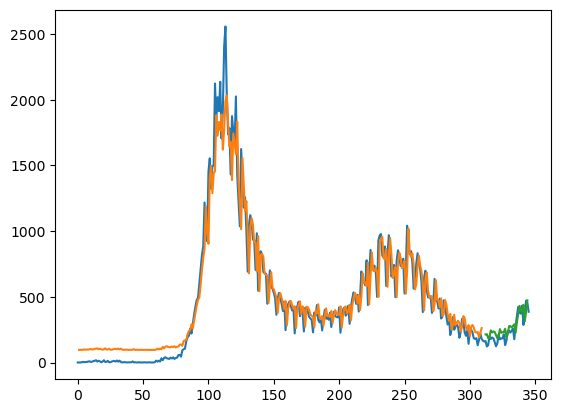

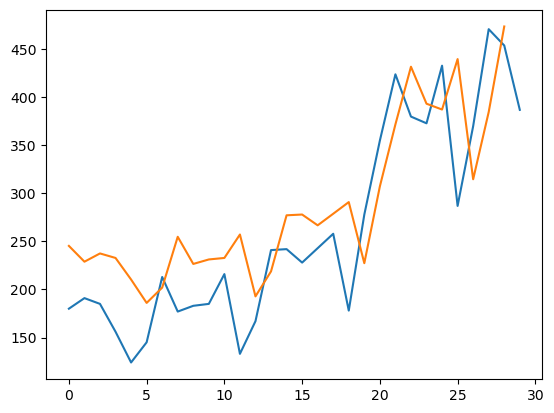

In [6]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="keelung_rnn+lstm_5000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('keelung_rnn+lstm_5000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('keelung_rnn+lstm_5000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("keelung_rnn+lstm_5000_predict&real_4.png")
plt.show()